# VDRE and RARE Motif Search in MHC Class II and MHC Class II-related Genes using `scan_sequences`

Aims of experiments:

- Search and retrieve DNA-binding  motifs
- Extract the DNA Sequences of promoter regions of MHC Class II genes
- Locate motifs in the promoter sequences of genes

e.g. Do HLA-DR and HLA-DR-related genes have a VDRE or RARE motif in their promoter regions?

Sequence-based TF binding site search methods answer the following questions:
- For a given TF, what DNA Sequence pattern does it preferentially bind to?
- Are these patterns present in the promoter region of a gene?

#### Setting the p value

When scanning for sequences we have to decide the minimum *logodds threshold* for retrieving matches. One way is to set the cut off between 0 and 1. Then it multiply the highest possible PWM score to get a threshold. `matchPWM` uses a default of 0.8 (shown as 80%) but this can be changed.

An alternative is to start with the maximum p-value that can be considered appropriate for a match. E.g. if we want matches with a p-value of at most 0.001, then we can use `motif_pvalue()` to calculate the appropriate threshold.

#### Testing for Motif Positional Preferences in Sequences

`motif_peaks` tests for positionally preferential motif sites in a set of sequences. This can be useful when trying o determine whether a certain TFBS is more often than not located at a certain distance form the TSS. The `motif_peaks` finds density peaks in the input data and then creates a null distribution from randomly generated peaks to calculate peak p-values.

In [3]:
#necessary packages

if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("universalmotif")
BiocManager::install("TFBSTools")
BiocManager::install("Biostrings")
BiocManager::install("MotifDb")
BiocManager::install("ggtree")
BiocManager::install("ggbio")
install.packages("ggplot2")
BiocManager::install("TxDb.Hsapiens.UCSC.hg38.knownGene")
BiocManager::install("GenomicFeatures")
BiocManager::install("JASPAR2020")
BiocManager::install("BSgenome.Hsapiens.UCSC.hg38")
BiocManager::install("GenomicRanges")
BiocManager::install("AnnotationHub")

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.1 (2019-07-05)
Installing package(s) 'universalmotif'


package 'universalmotif' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'universalmotif'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Eleni\Documents\R\win-library\3.6\00LOCK\universalmotif\libs\x64\universalmotif.dll to C:\Users\Eleni\Documents\R\win-library\3.6\universalmotif\libs\x64\universalmotif.dll: Permission denied"Warning message:
"restored 'universalmotif'"


The downloaded binary packages are in
	C:\Users\Eleni\AppData\Local\Temp\Rtmp4KIEXN\downloaded_packages


Old packages: 'ade4', 'ape', 'backports', 'BH', 'BiocManager', 'bitops',
  'callr', 'caTools', 'cli', 'colorspace', 'crayon', 'curl', 'DBI', 'desc',
  'devtools', 'digest', 'dplyr', 'DT', 'e1071', 'ellipsis', 'fansi', 'farver',
  'gert', 'GGally', 'gh', 'glue', 'gtools', 'htmlTable', 'igraph', 'isoband',
  'jsonlite', 'labeling', 'lattice', 'magrittr', 'Matrix', 'matrixStats',
  'memoise', 'mime', 'openssl', 'Peptides', 'phangorn', 'pillar', 'pixmap',
  'pkgload', 'processx', 'ps', 'R6', 'rappdirs', 'rbibutils', 'Rcpp', 'RCurl',
  'Rdpack', 'remotes', 'rentrez', 'rlang', 'rprojroot', 'RSQLite',
  'rstudioapi', 'rversions', 'segmented', 'seqinr', 'sp', 'stringi',
  'survival', 'sys', 'testthat', 'tibble', 'tidyselect', 'tidytree', 'utf8',
  'vctrs', 'viridis', 'viridisLite', 'withr', 'zip', 'askpass', 'boot',
  'broom', 'caret', 'class', 'clipr', 'cluster', 'codetools', 'data.table',
  'dbplyr', 'evaluate', 'forcats', 'foreach', 'formatR', 'fs', 'generics',
  'ggplot2', 'glmnet', 'gower

package 'TFBSTools' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'TFBSTools'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Eleni\Documents\R\win-library\3.6\00LOCK\TFBSTools\libs\x64\TFBSTools.dll to C:\Users\Eleni\Documents\R\win-library\3.6\TFBSTools\libs\x64\TFBSTools.dll: Permission denied"Warning message:
"restored 'TFBSTools'"


The downloaded binary packages are in
	C:\Users\Eleni\AppData\Local\Temp\Rtmp4KIEXN\downloaded_packages


Old packages: 'ade4', 'ape', 'backports', 'BH', 'BiocManager', 'bitops',
  'callr', 'caTools', 'cli', 'colorspace', 'crayon', 'curl', 'DBI', 'desc',
  'devtools', 'digest', 'dplyr', 'DT', 'e1071', 'ellipsis', 'fansi', 'farver',
  'gert', 'GGally', 'gh', 'glue', 'gtools', 'htmlTable', 'igraph', 'isoband',
  'jsonlite', 'labeling', 'lattice', 'magrittr', 'Matrix', 'matrixStats',
  'memoise', 'mime', 'openssl', 'Peptides', 'phangorn', 'pillar', 'pixmap',
  'pkgload', 'processx', 'ps', 'R6', 'rappdirs', 'rbibutils', 'Rcpp', 'RCurl',
  'Rdpack', 'remotes', 'rentrez', 'rlang', 'rprojroot', 'RSQLite',
  'rstudioapi', 'rversions', 'segmented', 'seqinr', 'sp', 'stringi',
  'survival', 'sys', 'testthat', 'tibble', 'tidyselect', 'tidytree', 'utf8',
  'vctrs', 'viridis', 'viridisLite', 'withr', 'zip', 'askpass', 'boot',
  'broom', 'caret', 'class', 'clipr', 'cluster', 'codetools', 'data.table',
  'dbplyr', 'evaluate', 'forcats', 'foreach', 'formatR', 'fs', 'generics',
  'ggplot2', 'glmnet', 'gower

package 'Biostrings' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Biostrings'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Eleni\Documents\R\win-library\3.6\00LOCK\Biostrings\libs\x64\Biostrings.dll to C:\Users\Eleni\Documents\R\win-library\3.6\Biostrings\libs\x64\Biostrings.dll: Permission denied"Warning message:
"restored 'Biostrings'"


The downloaded binary packages are in
	C:\Users\Eleni\AppData\Local\Temp\Rtmp4KIEXN\downloaded_packages


Old packages: 'ade4', 'ape', 'backports', 'BH', 'BiocManager', 'bitops',
  'callr', 'caTools', 'cli', 'colorspace', 'crayon', 'curl', 'DBI', 'desc',
  'devtools', 'digest', 'dplyr', 'DT', 'e1071', 'ellipsis', 'fansi', 'farver',
  'gert', 'GGally', 'gh', 'glue', 'gtools', 'htmlTable', 'igraph', 'isoband',
  'jsonlite', 'labeling', 'lattice', 'magrittr', 'Matrix', 'matrixStats',
  'memoise', 'mime', 'openssl', 'Peptides', 'phangorn', 'pillar', 'pixmap',
  'pkgload', 'processx', 'ps', 'R6', 'rappdirs', 'rbibutils', 'Rcpp', 'RCurl',
  'Rdpack', 'remotes', 'rentrez', 'rlang', 'rprojroot', 'RSQLite',
  'rstudioapi', 'rversions', 'segmented', 'seqinr', 'sp', 'stringi',
  'survival', 'sys', 'testthat', 'tibble', 'tidyselect', 'tidytree', 'utf8',
  'vctrs', 'viridis', 'viridisLite', 'withr', 'zip', 'askpass', 'boot',
  'broom', 'caret', 'class', 'clipr', 'cluster', 'codetools', 'data.table',
  'dbplyr', 'evaluate', 'forcats', 'foreach', 'formatR', 'fs', 'generics',
  'ggplot2', 'glmnet', 'gower

package 'MotifDb' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Eleni\AppData\Local\Temp\Rtmp4KIEXN\downloaded_packages


Old packages: 'ade4', 'ape', 'backports', 'BH', 'BiocManager', 'bitops',
  'callr', 'caTools', 'cli', 'colorspace', 'crayon', 'curl', 'DBI', 'desc',
  'devtools', 'digest', 'dplyr', 'DT', 'e1071', 'ellipsis', 'fansi', 'farver',
  'gert', 'GGally', 'gh', 'glue', 'gtools', 'htmlTable', 'igraph', 'isoband',
  'jsonlite', 'labeling', 'lattice', 'magrittr', 'Matrix', 'matrixStats',
  'memoise', 'mime', 'openssl', 'Peptides', 'phangorn', 'pillar', 'pixmap',
  'pkgload', 'processx', 'ps', 'R6', 'rappdirs', 'rbibutils', 'Rcpp', 'RCurl',
  'Rdpack', 'remotes', 'rentrez', 'rlang', 'rprojroot', 'RSQLite',
  'rstudioapi', 'rversions', 'segmented', 'seqinr', 'sp', 'stringi',
  'survival', 'sys', 'testthat', 'tibble', 'tidyselect', 'tidytree', 'utf8',
  'vctrs', 'viridis', 'viridisLite', 'withr', 'zip', 'askpass', 'boot',
  'broom', 'caret', 'class', 'clipr', 'cluster', 'codetools', 'data.table',
  'dbplyr', 'evaluate', 'forcats', 'foreach', 'formatR', 'fs', 'generics',
  'ggplot2', 'glmnet', 'gower

package 'ggtree' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Eleni\AppData\Local\Temp\Rtmp4KIEXN\downloaded_packages


Old packages: 'ade4', 'ape', 'backports', 'BH', 'BiocManager', 'bitops',
  'callr', 'caTools', 'cli', 'colorspace', 'crayon', 'curl', 'DBI', 'desc',
  'devtools', 'digest', 'dplyr', 'DT', 'e1071', 'ellipsis', 'fansi', 'farver',
  'gert', 'GGally', 'gh', 'glue', 'gtools', 'htmlTable', 'igraph', 'isoband',
  'jsonlite', 'labeling', 'lattice', 'magrittr', 'Matrix', 'matrixStats',
  'memoise', 'mime', 'openssl', 'Peptides', 'phangorn', 'pillar', 'pixmap',
  'pkgload', 'processx', 'ps', 'R6', 'rappdirs', 'rbibutils', 'Rcpp', 'RCurl',
  'Rdpack', 'remotes', 'rentrez', 'rlang', 'rprojroot', 'RSQLite',
  'rstudioapi', 'rversions', 'segmented', 'seqinr', 'sp', 'stringi',
  'survival', 'sys', 'testthat', 'tibble', 'tidyselect', 'tidytree', 'utf8',
  'vctrs', 'viridis', 'viridisLite', 'withr', 'zip', 'askpass', 'boot',
  'broom', 'caret', 'class', 'clipr', 'cluster', 'codetools', 'data.table',
  'dbplyr', 'evaluate', 'forcats', 'foreach', 'formatR', 'fs', 'generics',
  'ggplot2', 'glmnet', 'gower

package 'ggbio' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Eleni\AppData\Local\Temp\Rtmp4KIEXN\downloaded_packages


Old packages: 'ade4', 'ape', 'backports', 'BH', 'BiocManager', 'bitops',
  'callr', 'caTools', 'cli', 'colorspace', 'crayon', 'curl', 'DBI', 'desc',
  'devtools', 'digest', 'dplyr', 'DT', 'e1071', 'ellipsis', 'fansi', 'farver',
  'gert', 'GGally', 'gh', 'glue', 'gtools', 'htmlTable', 'igraph', 'isoband',
  'jsonlite', 'labeling', 'lattice', 'magrittr', 'Matrix', 'matrixStats',
  'memoise', 'mime', 'openssl', 'Peptides', 'phangorn', 'pillar', 'pixmap',
  'pkgload', 'processx', 'ps', 'R6', 'rappdirs', 'rbibutils', 'Rcpp', 'RCurl',
  'Rdpack', 'remotes', 'rentrez', 'rlang', 'rprojroot', 'RSQLite',
  'rstudioapi', 'rversions', 'segmented', 'seqinr', 'sp', 'stringi',
  'survival', 'sys', 'testthat', 'tibble', 'tidyselect', 'tidytree', 'utf8',
  'vctrs', 'viridis', 'viridisLite', 'withr', 'zip', 'askpass', 'boot',
  'broom', 'caret', 'class', 'clipr', 'cluster', 'codetools', 'data.table',
  'dbplyr', 'evaluate', 'forcats', 'foreach', 'formatR', 'fs', 'generics',
  'ggplot2', 'glmnet', 'gower


  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE



installing the source package 'ggplot2'

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.1 (2019-07-05)
Installing package(s) 'TxDb.Hsapiens.UCSC.hg38.knownGene'
installing the source package 'TxDb.Hsapiens.UCSC.hg38.knownGene'

Warning message in install.packages(...):
"installation of package 'TxDb.Hsapiens.UCSC.hg38.knownGene' had non-zero exit status"Old packages: 'ade4', 'ape', 'backports', 'BH', 'BiocManager', 'bitops',
  'callr', 'caTools', 'cli', 'colorspace', 'crayon', 'curl', 'DBI', 'desc',
  'devtools', 'digest', 'dplyr', 'DT', 'e1071', 'ellipsis', 'fansi', 'farver',
  'gert', 'GGally', 'gh', 'glue', 'gtools', 'htmlTable', 'igraph', 'isoband',
  'jsonlite', 'labeling', 'lattice', 'magrittr', 'Matrix', 'matrixStats',
  'memoise', 'mime', 'openssl', 'Peptides', 'phangorn', 'pillar', 'pixmap',
  'pkgload', 'processx', 'ps', 'R6', 'rappdirs', 'rbibutils', 'Rcpp', 'RCurl',
  'Rdpack', 'remotes', 'rentrez', 'rlang', 'rprojroot', 'RSQLite',
  'rstudioapi', 'rversions', 'segm

package 'GenomicFeatures' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Eleni\AppData\Local\Temp\Rtmp4KIEXN\downloaded_packages


Old packages: 'ade4', 'ape', 'backports', 'BH', 'BiocManager', 'bitops',
  'callr', 'caTools', 'cli', 'colorspace', 'crayon', 'curl', 'DBI', 'desc',
  'devtools', 'digest', 'dplyr', 'DT', 'e1071', 'ellipsis', 'fansi', 'farver',
  'gert', 'GGally', 'gh', 'glue', 'gtools', 'htmlTable', 'igraph', 'isoband',
  'jsonlite', 'labeling', 'lattice', 'magrittr', 'Matrix', 'matrixStats',
  'memoise', 'mime', 'openssl', 'Peptides', 'phangorn', 'pillar', 'pixmap',
  'pkgload', 'processx', 'ps', 'R6', 'rappdirs', 'rbibutils', 'Rcpp', 'RCurl',
  'Rdpack', 'remotes', 'rentrez', 'rlang', 'rprojroot', 'RSQLite',
  'rstudioapi', 'rversions', 'segmented', 'seqinr', 'sp', 'stringi',
  'survival', 'sys', 'testthat', 'tibble', 'tidyselect', 'tidytree', 'utf8',
  'vctrs', 'viridis', 'viridisLite', 'withr', 'zip', 'askpass', 'boot',
  'broom', 'caret', 'class', 'clipr', 'cluster', 'codetools', 'data.table',
  'dbplyr', 'evaluate', 'forcats', 'foreach', 'formatR', 'fs', 'generics',
  'ggplot2', 'glmnet', 'gower

package 'GenomicRanges' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'GenomicRanges'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Eleni\Documents\R\win-library\3.6\00LOCK\GenomicRanges\libs\x64\GenomicRanges.dll to C:\Users\Eleni\Documents\R\win-library\3.6\GenomicRanges\libs\x64\GenomicRanges.dll: Permission denied"Warning message:
"restored 'GenomicRanges'"


The downloaded binary packages are in
	C:\Users\Eleni\AppData\Local\Temp\Rtmp4KIEXN\downloaded_packages


Old packages: 'ade4', 'ape', 'backports', 'BH', 'BiocManager', 'bitops',
  'callr', 'caTools', 'cli', 'colorspace', 'crayon', 'curl', 'DBI', 'desc',
  'devtools', 'digest', 'dplyr', 'DT', 'e1071', 'ellipsis', 'fansi', 'farver',
  'gert', 'GGally', 'gh', 'glue', 'gtools', 'htmlTable', 'igraph', 'isoband',
  'jsonlite', 'labeling', 'lattice', 'magrittr', 'Matrix', 'matrixStats',
  'memoise', 'mime', 'openssl', 'Peptides', 'phangorn', 'pillar', 'pixmap',
  'pkgload', 'processx', 'ps', 'R6', 'rappdirs', 'rbibutils', 'Rcpp', 'RCurl',
  'Rdpack', 'remotes', 'rentrez', 'rlang', 'rprojroot', 'RSQLite',
  'rstudioapi', 'rversions', 'segmented', 'seqinr', 'sp', 'stringi',
  'survival', 'sys', 'testthat', 'tibble', 'tidyselect', 'tidytree', 'utf8',
  'vctrs', 'viridis', 'viridisLite', 'withr', 'zip', 'askpass', 'boot',
  'broom', 'caret', 'class', 'clipr', 'cluster', 'codetools', 'data.table',
  'dbplyr', 'evaluate', 'forcats', 'foreach', 'formatR', 'fs', 'generics',
  'ggplot2', 'glmnet', 'gower

package 'AnnotationHub' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Eleni\AppData\Local\Temp\Rtmp4KIEXN\downloaded_packages


Old packages: 'ade4', 'ape', 'backports', 'BH', 'BiocManager', 'bitops',
  'callr', 'caTools', 'cli', 'colorspace', 'crayon', 'curl', 'DBI', 'desc',
  'devtools', 'digest', 'dplyr', 'DT', 'e1071', 'ellipsis', 'fansi', 'farver',
  'gert', 'GGally', 'gh', 'glue', 'gtools', 'htmlTable', 'igraph', 'isoband',
  'jsonlite', 'labeling', 'lattice', 'magrittr', 'Matrix', 'matrixStats',
  'memoise', 'mime', 'openssl', 'Peptides', 'phangorn', 'pillar', 'pixmap',
  'pkgload', 'processx', 'ps', 'R6', 'rappdirs', 'rbibutils', 'Rcpp', 'RCurl',
  'Rdpack', 'remotes', 'rentrez', 'rlang', 'rprojroot', 'RSQLite',
  'rstudioapi', 'rversions', 'segmented', 'seqinr', 'sp', 'stringi',
  'survival', 'sys', 'testthat', 'tibble', 'tidyselect', 'tidytree', 'utf8',
  'vctrs', 'viridis', 'viridisLite', 'withr', 'zip', 'askpass', 'boot',
  'broom', 'caret', 'class', 'clipr', 'cluster', 'codetools', 'data.table',
  'dbplyr', 'evaluate', 'forcats', 'foreach', 'formatR', 'fs', 'generics',
  'ggplot2', 'glmnet', 'gower

In [4]:
#run the downloaded packages

library(GenomicRanges)
library(BSgenome.Hsapiens.UCSC.hg38)
library(TxDb.Hsapiens.UCSC.hg38.knownGene)
library(universalmotif)
library(TFBSTools)
library(Biostrings)
library(MotifDb)
library(ggtree)
library(ggbio)
library(ggplot2)
library(JASPAR2020)
library(GenomicFeatures)
library(AnnotationHub)

Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Loading required package: S4Vectors
Warning message:
"package 'S4Vectors' was bui

ERROR: Error in library(JASPAR2020): there is no package called 'JASPAR2020'


## HLA-DRB1

Is there VDRE and RARE motif-matching in the promoter regions of HLA-DRB1 gene transcript?

- JASPAR VDRE motif used: jaspar2018 RXRA::VDR - MA0074.1
- JASPAR RARE motif used: jaspar2018 RARA:RXRA - MA0159.1

### VDRE

#### 1. Retrieve the JASPAR VDRE motif and create the reverse complement

In [4]:
#there are 4 PFMs for the VDRE motif on JASPAR

VDRE_jaspar <- query(MotifDb,"RXRA::VDR")
VDRE_jaspar

MotifDb object of length 4
| Created from downloaded public sources: 2013-Aug-30
| 4 position frequency matrices from 4 sources:
|        JASPAR_2014:    1
|        JASPAR_CORE:    1
|         jaspar2016:    1
|         jaspar2018:    1
| 1 organism/s
|           Hsapiens:    4
Hsapiens-JASPAR_CORE-RXRA::VDR-MA0074.1 
Hsapiens-JASPAR_2014-RXRA::VDR-MA0074.1 
Hsapiens-jaspar2016-RXRA::VDR-MA0074.1 
Hsapiens-jaspar2018-RXRA::VDR-MA0074.1 

In [10]:
#use the most recent JASPAR 2018 VDRE motif

VDRE_jaspar <- query(MotifDb,"RXRA::VDR")[[2]] #JASPAR CORE version
VDRE_jaspar

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
A,0.3,0,0.0,0,0.0,0.9,0.4,0.2,0.2,0.5,0,0,0.1,0.0,0.7
C,0.0,0,0.0,0,0.9,0.0,0.2,0.4,0.0,0.0,0,0,0.0,0.9,0.1
G,0.7,1,0.9,0,0.0,0.1,0.0,0.2,0.8,0.5,1,0,0.0,0.0,0.2
T,0.0,0,0.1,1,0.1,0.0,0.4,0.2,0.0,0.0,0,1,0.9,0.1,0.0


In [503]:
motif_pvalue(VDRE_jaspar, pvalue = 0.0001)

Warning message in motif_pvalue(VDRE_jaspar, pvalue = 1e-04):
"Found -Inf values in motif PWM, adding a pseudocount of 1"

[1] 4.7397

#### 2. Retrieve the gene sequence of MHC Class II molecules using the `entrez geneID` and query the desired human genome assembly from the UCSC database 

In [6]:
HLADRB1 <- "3123"   #entrez geneID
DRB1_seq <- transcriptsBy(TxDb.Hsapiens.UCSC.hg38.knownGene, by="gene")[HLADRB1] #transcripts by gene
DRB1_seq

GRangesList object of length 1:
$`3123`
GRanges object with 12 ranges and 2 metadata columns:
                  seqnames            ranges strand |     tx_id
                     <Rle>         <IRanges>  <Rle> | <integer>
   [1]                chr6 32578769-32589848      - |     77538
   [2] chr6_GL000250v2_alt   3823889-3837634      - |    231023
   [3] chr6_GL000251v2_alt   3998045-4011459      - |    232228
   [4] chr6_GL000251v2_alt   4000478-4028652      - |    232229
   [5] chr6_GL000252v2_alt   3814543-3830112      - |    233461
   ...                 ...               ...    ... .       ...
   [8] chr6_GL000253v2_alt   3991308-4023043      - |    234574
   [9] chr6_GL000255v2_alt   3779004-3792428      - |    236983
  [10] chr6_GL000255v2_alt   3781437-3809621      - |    236984
  [11] chr6_GL000256v2_alt   3979128-3993834      - |    238150
  [12] chr6_GL000256v2_alt   3981401-4012352      - |    238151
                  tx_name
              <character>
   [1]  ENST0000036000

#### 4. Retrieve the Promoter Sequence of the transcripts of HLA-DRB1

In [7]:
promoter_DRB1 <- getPromoterSeq(DRB1_seq, Hsapiens, upstream=1000, downstream=100)
promoter_DRB1

DNAStringSetList of length 1
[["3123"]] 3123=TCCCTTACGATAAAACAAGAGAAGTGGAATACTAAAGGGCCATAGCCTTAAACAAAGGAGG...

#### 5. Convert the VDRE Position Frequency Matrix to a Position Count Matrix

In [11]:
VDRE_PCM <- convert_type(VDRE_jaspar, type = 'PCM')
VDRE_PCM

motifs converted to class 'universalmotif'



       Motif name:   motif
         Alphabet:   DNA
             Type:   PCM
          Strands:   +-
         Total IC:   20.45
        Consensus:   RGGTCAWNGRGTTCA

   R   G  G   T  C  A  W  N  G  R   G   T  T  C  A
A 30   0  0   0  0 90 40 20 20 50   0   0 10  0 70
C  0   0  0   0 90  0 20 40  0  0   0   0  0 90 10
G 70 100 90   0  0 10  0 20 80 50 100   0  0  0 20
T  0   0 10 100 10  0 40 20  0  0   0 100 90 10  0

#### 6. Find motif matches in the promoter sequences using the Position Weight Matrix of the TF motif by determining the stringency

`unlist()[[]]` gets rid of the geneID in front of the `DNAStringSetList` of the promoter sequence e.g. ([["3123"]] 3123=TCCCTTACGATAAAACAAGAGAAGTGGAATACTAAA...) and provides a dataframe with the promoters for each gene transcript from the GRanges object

In [9]:
as.character(promoter_DRB1[["3123"]])[1]

3123 
"TCCCTTACGATAAAACAAGAGAAGTGGAATACTAAAGGGCCATAGCCTTAAACAAAGGAGGAAATCATAATGGGAGCCAAGAATGAGGGATTGAACACTCGACATAAAATATTAATTATGGTAAAACAGAGTTGTTCTGTCAACAGCTGACTTTGAGTCCTTGATCGATCATCTCAGCCCCCTGCATACTTTGATTACACAGTTGACCTTAACACATTGATAGGGTAAGTGCTATACAAAAGCAACTTCGGACTCTCCATTGCACATAGGTGGCCCCTGCAAGCCCCTTGCCTGTGTGTGTTCTGGAGATGACACTAAACTTGGGGGCAGCATCAGGAGACACACTTGAAAAAACTCTTTTTACTCAGATTAAATTATTAACTAACTTTCAATTTCCTTTAACTTATTACAGACATCTCTACCTGTAAATAGGTACAGATTAAGCTCTCCGGTCAACAGCTGTCATTCTGTCATATCATCAGATACCCGGAGCTGCTGCTCCTTGAGGCATCCACAGAATCACATTTTCTAGTGTTGAAAGACCTGAAAGATCATGGTGCCTTCATTTCAACTGTGAGACATGACGTAATTTTCCCAAATCTACAACATTAAGATATGGTGCAATAAGGACCAGATTAAAGGTCTCCTGATTTGCGGCCATGTTCCCTCCATCTCCTTTACTCCTAAACACACTCACACTCACTCCTGCAAATAGTTGTCTTGTCAAGTGGGAAATGAATGCTCTTACAAGGCTCAAACTTGTGAACACATCACTGACCAGCACAGAGCTGGCTACAATAGCTCCCCAATTAAGGTGTTTTACATGCAACTGGTTCAAACCTTCCAAGTGCTAAATTAAAACAATCCTTTAAAGAAGGAAATTCTGTTTCAGAAGAGGACCTTCATACAGCATCTCTGACCAGCAACTGATGATGCTATTGAACTCAGATGCTGATTGGTTCTCCAACACGAGATTACCCAACCCAGGAGCAAGGAAATCAGTAACTTCCTCCCTATAACTTGGAATGTGGGTGGAGGGGTTCATAGTTCTCCCTGAGTGAGACTTGCCTGCTTCTCTGGCCCCTGGTCCTGTCCTGTTC"

In [10]:
scan_sequences(VDRE_PCM, unlist(promoter_DRB1)[[1]], threshold = 0.0001, threshold.type = 'pvalue', RC = TRUE)

DataFrame with 1 row and 12 columns
        motif   motif.i    sequence     start      stop     score
  <character> <integer> <character> <integer> <integer> <numeric>
1       motif         1           1      1030      1044    11.475
            match thresh.score min.score max.score        score.pct      strand
      <character>    <numeric> <numeric> <numeric>        <numeric> <character>
1 GGGTGGAGGGGTTCA       4.8476    -93.53    24.097 47.6200356890899           +

- JASPAR Validation **Relative Profile Score Threshold 80%**

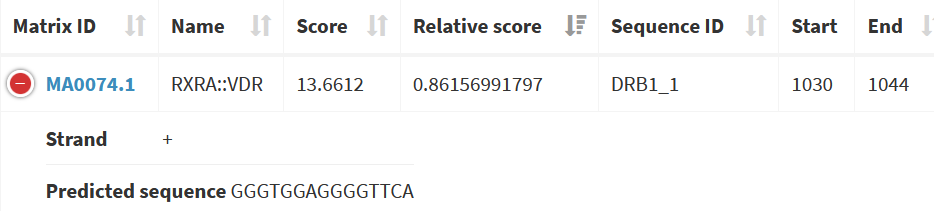

- EPD Search Motif Tool -1000 to 100 bp relative to TSS and **cut-off p-value = 0.0001**. VDRE Motif JASPAR 2018 version.

Promoter Sequence 
>FP009562 HLA-DRB1_1 :+U EU:NC; range -1000 to 100.
agccttaaacaaaggaggaaatcataatgggagccaagaatgagggattgaacactcgac
ataaaatattaattatggtaaaacagagttgttctgtcaacagctgactttgagtccttg
atcgatcatctcagccccctgcatactttgattacacagttgaccttaacacattgatag
ggtaagtgctatacaaaagcaacttcggactctccattgcacataggtggcccctgcaag
ccccttgcctgtgtgtgttctggagatgacactaaacttgggggcagcatcaggagacac
acttgaaaaaactctttttactcagattaaattattaactaactttcaatttcctttaac
ttattacagacatctctacctgtaaataggtacagattaagctctccggtcaacagctgt
cattctgtcatatcatcagatacccggagctgctgctccttgaggcatccacagaatcac
attttctagtgttgaaagacctgaaagatcatggtgccttcatttcaactgtgagacatg
acgtaattttcccaaatctacaacattaagatatggtgcaataaggaccagattaaaggt
ctcctgatttgcggccatgttccctccatctcctttactcctaaacacactcacactcac
tcctgcaaatagttgtcttgtcaagtgggaaatgaatgctcttacaaggctcaaacttgt
gaacacatcactgaccagcacagagctggctacaatagctccccaattaaggtgttttac
atgcaactggttcaaaccttccaagtgctaaattaaaacaatcctttaaagaaggaaatt
ctgtttcagaagaggaccttcatacagcatctctgaccagcaactgatgatgctattgaa
ctcagatgctgattggttctccaacacgagattacccaacccaggagcaaggaaatcagt
aacttcctccctataacttggaatgtgggtggaggggttcATAGTTCTCCCTGAGTGAGA
CTTGCCTGCTTCTCTGGCCCCTGGTCCTGTCCTGTTCTCCAGCATGGTGTGTCTGAAGCT
CCCTGGAGGCTCCTGCATGAC

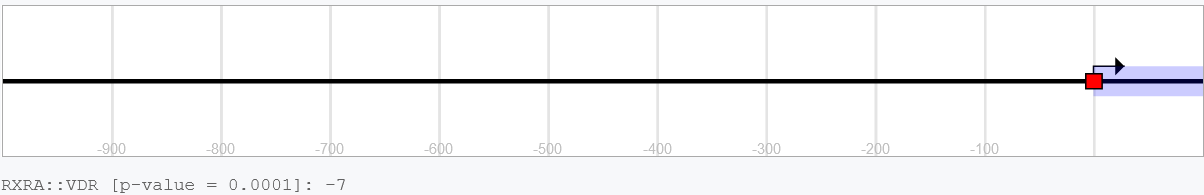

### RARE

In [11]:
#there are 2 PFMs for the RARE motif on JASPAR
RARE_jaspar <- query(MotifDb, "RARA::RXRA")
RARE_jaspar

MotifDb object of length 2
| Created from downloaded public sources: 2013-Aug-30
| 2 position frequency matrices from 2 sources:
|         jaspar2016:    1
|         jaspar2018:    1
| 1 organism/s
|           Hsapiens:    2
Hsapiens-jaspar2016-RARA::RXRA-MA0159.1 
Hsapiens-jaspar2018-RARA::RXRA-MA0159.1 

In [12]:
RARE_jaspar <- query(MotifDb, "RARA::RXRA")[[2]] #2018 version
RARE_jaspar

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
A,0.5217391,0,0.04347826,0.00000000,0.00000000,0.95652174,0.1739130,0.21739130,0.2173913,0.56521739,0.2173913,0.7391304,0.04347826,0.00000000,0.08695652,0.04347826,0.91304348
C,0.0000000,0,0.00000000,0.00000000,0.78260870,0.00000000,0.3043478,0.34782609,0.1739130,0.04347826,0.2608696,0.1304348,0.04347826,0.04347826,0.04347826,0.73913043,0.00000000
G,0.4782609,1,0.56521739,0.04347826,0.13043478,0.04347826,0.2173913,0.39130435,0.4782609,0.30434783,0.5217391,0.1304348,0.86956522,0.69565217,0.13043478,0.13043478,0.04347826
T,0.0000000,0,0.39130435,0.95652174,0.08695652,0.00000000,0.3043478,0.04347826,0.1304348,0.08695652,0.0000000,0.0000000,0.04347826,0.26086957,0.73913043,0.08695652,0.04347826


In [13]:
HLADRB1 <- "3123"   #entrez geneID
DRB1_seq <- transcriptsBy(TxDb.Hsapiens.UCSC.hg38.knownGene, by="gene")[HLADRB1] #transcripts by gene
DRB1_seq

GRangesList object of length 1:
$`3123`
GRanges object with 12 ranges and 2 metadata columns:
                  seqnames            ranges strand |     tx_id
                     <Rle>         <IRanges>  <Rle> | <integer>
   [1]                chr6 32578769-32589848      - |     77538
   [2] chr6_GL000250v2_alt   3823889-3837634      - |    231023
   [3] chr6_GL000251v2_alt   3998045-4011459      - |    232228
   [4] chr6_GL000251v2_alt   4000478-4028652      - |    232229
   [5] chr6_GL000252v2_alt   3814543-3830112      - |    233461
   ...                 ...               ...    ... .       ...
   [8] chr6_GL000253v2_alt   3991308-4023043      - |    234574
   [9] chr6_GL000255v2_alt   3779004-3792428      - |    236983
  [10] chr6_GL000255v2_alt   3781437-3809621      - |    236984
  [11] chr6_GL000256v2_alt   3979128-3993834      - |    238150
  [12] chr6_GL000256v2_alt   3981401-4012352      - |    238151
                  tx_name
              <character>
   [1]  ENST0000036000

In [14]:
promoter_DRB1 <- getPromoterSeq(DRB1_seq, Hsapiens, upstream=1000, downstream=100)
promoter_DRB1

DNAStringSetList of length 1
[["3123"]] 3123=TCCCTTACGATAAAACAAGAGAAGTGGAATACTAAAGGGCCATAGCCTTAAACAAAGGAGG...

In [13]:
RARE_PCM <- convert_type(RARE_jaspar, type = "PCM")
RARE_PCM

motifs converted to class 'universalmotif'



       Motif name:   motif
         Alphabet:   DNA
             Type:   PCM
          Strands:   +-
         Total IC:   16.17
        Consensus:   RGKTCANNNRSAGKTCA

   R   G  K  T  C  A  N  N  N  R  S  A  G  K  T  C  A
A 52   0  4  0  0 96 17 22 22 57 22 74  4  0  9  4 92
C  0   0  0  0 78  0 31 35 17  4 26 13  4  4  4 74  0
G 48 100 57  4 13  4 22 39 48 30 52 13 88 70 13 13  4
T  0   0 39 96  9  0 30  4 13  9  0  0  4 26 74  9  4

In [16]:
as.character(promoter_DRB1[["3123"]])[1]

3123 
"TCCCTTACGATAAAACAAGAGAAGTGGAATACTAAAGGGCCATAGCCTTAAACAAAGGAGGAAATCATAATGGGAGCCAAGAATGAGGGATTGAACACTCGACATAAAATATTAATTATGGTAAAACAGAGTTGTTCTGTCAACAGCTGACTTTGAGTCCTTGATCGATCATCTCAGCCCCCTGCATACTTTGATTACACAGTTGACCTTAACACATTGATAGGGTAAGTGCTATACAAAAGCAACTTCGGACTCTCCATTGCACATAGGTGGCCCCTGCAAGCCCCTTGCCTGTGTGTGTTCTGGAGATGACACTAAACTTGGGGGCAGCATCAGGAGACACACTTGAAAAAACTCTTTTTACTCAGATTAAATTATTAACTAACTTTCAATTTCCTTTAACTTATTACAGACATCTCTACCTGTAAATAGGTACAGATTAAGCTCTCCGGTCAACAGCTGTCATTCTGTCATATCATCAGATACCCGGAGCTGCTGCTCCTTGAGGCATCCACAGAATCACATTTTCTAGTGTTGAAAGACCTGAAAGATCATGGTGCCTTCATTTCAACTGTGAGACATGACGTAATTTTCCCAAATCTACAACATTAAGATATGGTGCAATAAGGACCAGATTAAAGGTCTCCTGATTTGCGGCCATGTTCCCTCCATCTCCTTTACTCCTAAACACACTCACACTCACTCCTGCAAATAGTTGTCTTGTCAAGTGGGAAATGAATGCTCTTACAAGGCTCAAACTTGTGAACACATCACTGACCAGCACAGAGCTGGCTACAATAGCTCCCCAATTAAGGTGTTTTACATGCAACTGGTTCAAACCTTCCAAGTGCTAAATTAAAACAATCCTTTAAAGAAGGAAATTCTGTTTCAGAAGAGGACCTTCATACAGCATCTCTGACCAGCAACTGATGATGCTATTGAACTCAGATGCTGATTGGTTCTCCAACACGAGATTACCCAACCCAGGAGCAAGGAAATCAGTAACTTCCTCCCTATAACTTGGAATGTGGGTGGAGGGGTTCATAGTTCTCCCTGAGTGAGACTTGCCTGCTTCTCTGGCCCCTGGTCCTGTCCTGTTC"

In [17]:
scan_sequences(RARE_PCM, unlist(promoter_DRB1)[[1]], threshold = 0.0001, threshold.type = 'pvalue', RC = TRUE)

DataFrame with 1 row and 12 columns
        motif   motif.i    sequence     start      stop     score
  <character> <integer> <character> <integer> <integer> <numeric>
1       motif         1           1       549       565     8.927
              match thresh.score min.score max.score       score.pct
        <character>    <numeric> <numeric> <numeric>       <numeric>
1 AGATCATGGTGCCTTCA       8.8808   -80.909    23.633 37.773452375915
       strand
  <character>
1           +

In [18]:
scan_sequences(RARE_PCM, unlist(promoter_DRB1)[[1]], threshold = 0.001, threshold.type = 'pvalue', RC = TRUE)

DataFrame with 2 rows and 12 columns
        motif   motif.i    sequence     start      stop     score
  <character> <integer> <character> <integer> <integer> <numeric>
1       motif         1           1       324       340     8.147
2       motif         1           1       549       565     8.927
              match thresh.score min.score max.score       score.pct
        <character>    <numeric> <numeric> <numeric>       <numeric>
1 GGGGCAGCATCAGGAGA       3.2611   -80.909    23.633 34.472982693691
2 AGATCATGGTGCCTTCA       3.2611   -80.909    23.633 37.773452375915
       strand
  <character>
1           +
2           +

- JASPAR Validation **Relative Profile Score Threshold 75%**

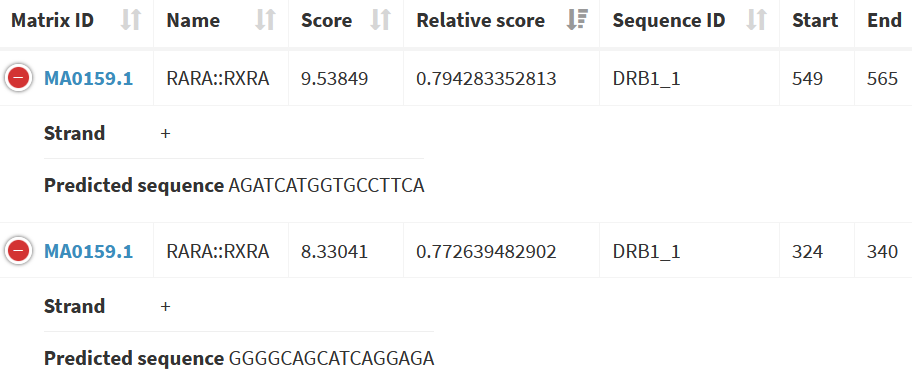

## HLA-DRA

### VDRE

In [19]:
HLADRA <- "3122"   #entrez geneID
DRA_seq <- transcriptsBy(TxDb.Hsapiens.UCSC.hg38.knownGene, by="gene")[HLADRA] #transcripts by gene
DRA_seq

GRangesList object of length 1:
$`3122`
GRanges object with 21 ranges and 2 metadata columns:
                  seqnames            ranges strand |     tx_id
                     <Rle>         <IRanges>  <Rle> | <integer>
   [1]                chr6 32439878-32445046      + |     72642
   [2]                chr6 32439887-32445046      + |     72643
   [3] chr6_GL000251v2_alt   3877968-3883135      + |    231614
   [4] chr6_GL000251v2_alt   3877998-3881320      + |    231615
   [5] chr6_GL000251v2_alt   3878050-3883135      + |    231616
   ...                 ...               ...    ... .       ...
  [17] chr6_GL000255v2_alt   3662973-3668101      + |    236393
  [18] chr6_GL000256v2_alt   3754985-3760195      + |    237596
  [19] chr6_GL000256v2_alt   3755015-3758338      + |    237597
  [20] chr6_GL000256v2_alt   3755067-3760195      + |    237598
  [21] chr6_KI270758v1_alt        9689-14891      - |    238252
                 tx_name
             <character>
   [1] ENST00000374982.5

In [20]:
promoter_DRA <- getPromoterSeq(DRA_seq, Hsapiens, upstream=1000, downstream=100)
promoter_DRA

DNAStringSetList of length 1
[["3122"]] 3122=GCCTGACCAACATGGTGAAACCCCGTCTCTACTAAAAATACAAAAATTATCCGGGCATGGT...

In [21]:
as.character(promoter_DRA[["3122"]])[1]

3122 
"GCCTGACCAACATGGTGAAACCCCGTCTCTACTAAAAATACAAAAATTATCCGGGCATGGTGGTGGGCGCCTGTAATCCCAGCTACTCAGGAGGCTGAGGCAGGAGAATCGCTTGAACCCGGGAGGCGGAGATTACAATGAGCTGAGATCACGCCACCAACTCCAGCTTGGGCGACAGAGCAAGACTCCGTCTAAAAAAAAAAAAAAAAAAAAAAAGAATAGGCTTTGCCCACTATACTCTCTCATATTCATTGACCTGAATCCTCAAATGAGGTGTGTCCATTAGTCAACTCCAATCTCTTGTCATATATAAGATGGTAGAGATGAGAAGAAGGTAGCTCCTTTACAGCCCACTATTTCCACTAACTACTACCTGTGTTTCAAGATACAGCCTTTCATCCTTCTCCAGTGTTGAGAGTGTTGAACCTCAGAGTTTCTCCTCTCATTTTCTCTAAATGAGATACAATGCCAGCCATCCCAAGCTCTTGGCCTGAGTTGATCATCTTGAAGTCTAGGACTCCAAGAAGCATGAAAGAGCTTCTTTAGTGAAGCTATGTCCTCAGTACTGCCAAAATTCAGACAATCTCCATGGCCTGACAATTTACCTTCTATTTGGGTAATTTATTGTCCCTTACGCAAACTCTCCAACTGTCATTGCACAGACATATGATCTGTATTTAGCTCTCACTTTAGGTGTTTCCATTGATTCTATTCTCACTAATGTGCTTCAGGTATATCCCTGTCTAGAAGTCAGATTGGGGTTAAAGAGTCTGTCCGTGATTGACTAACAGTCTTAAATACTTGATTTGTTGTTGTTGTTGTCCTGTTTGTTTAAGAACTTTACTTCTTTATCCAATGAACGGAGTATCTTGTGTCCTGGACCCTTTGCAAGAACCCTTCCCCTAGCAACAGATGCGTCATCTCAAAATATTTTTCTGATTGGCCAAAGAGTAATTGATTTGCATTTTAATGGTCAGACTCTATTACACCCCACATTCTCTTTTCTTTTATTCTTGTCTGTTCTGCCTCACTCCCGAGCTCTACTGACTCCCAACAGAGCGCCCAAGAAGAAAATGGCCATAAGTGGAGTCCCTGTGCTA"

In [22]:
scan_sequences(VDRE_PCM, unlist(promoter_DRA)[[1]], threshold = 0.0001, threshold.type = 'pvalue', RC = TRUE)

DataFrame with 2 rows and 12 columns
        motif   motif.i    sequence     start      stop     score
  <character> <integer> <character> <integer> <integer> <numeric>
1       motif         1           1       759       773     6.544
2       motif         2           1       258       244     5.176
            match thresh.score min.score max.score        score.pct      strand
      <character>    <numeric> <numeric> <numeric>        <numeric> <character>
1 GGGTTAAAGAGTCTG       4.5668    -93.53    24.097 27.1569074988588           +
2 AGGTCAATGAATATG       4.5668    -93.53    24.097 21.4798522637673           -

In [23]:
scan_sequences(VDRE_PCM, unlist(promoter_DRA)[[1]], threshold = 0.001, threshold.type = 'pvalue', RC = TRUE)

DataFrame with 4 rows and 12 columns
        motif   motif.i    sequence     start      stop     score
  <character> <integer> <character> <integer> <integer> <numeric>
1       motif         1           1       759       773     6.544
2       motif         2           1       258       244     5.176
3       motif         2           1       520       506    -2.682
4       motif         2           1       595       581    -0.334
            match thresh.score min.score max.score         score.pct
      <character>    <numeric> <numeric> <numeric>         <numeric>
1 GGGTTAAAGAGTCTG      -3.1715    -93.53    24.097  27.1569074988588
2 AGGTCAATGAATATG      -3.1715    -93.53    24.097  21.4798522637673
3 GAGTCCTAGACTTCA      -3.1715    -93.53    24.097 -11.1300161845873
4 AGGCCATGGAGATTG      -3.1715    -93.53    24.097 -1.38606465535129
       strand
  <character>
1           +
2           -
3           -
4           -

- JASPAR Validation **Relative Profile Score Threshold 75%**

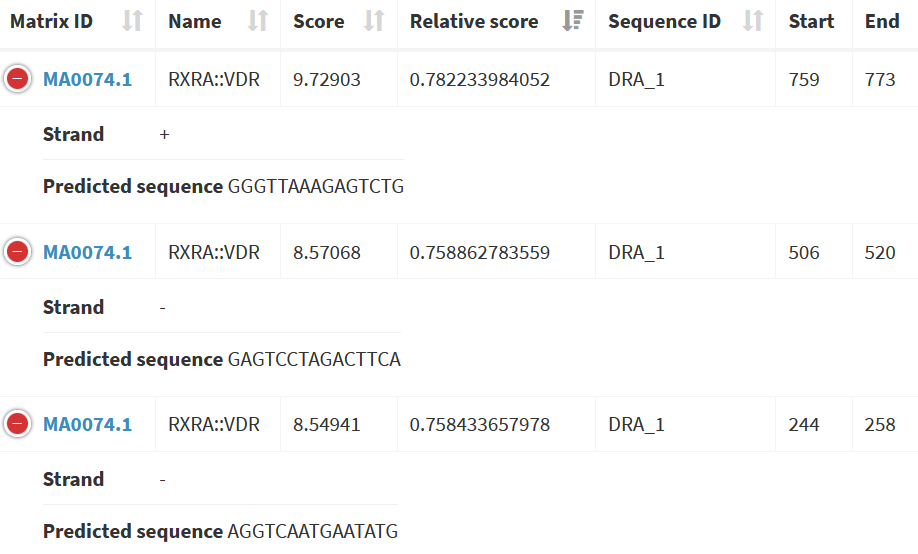

### RARE

In [24]:
HLADRA <- "3122"   #entrez geneID
DRA_seq <- transcriptsBy(TxDb.Hsapiens.UCSC.hg38.knownGene, by="gene")[HLADRA] #transcripts by gene
DRA_seq

GRangesList object of length 1:
$`3122`
GRanges object with 21 ranges and 2 metadata columns:
                  seqnames            ranges strand |     tx_id
                     <Rle>         <IRanges>  <Rle> | <integer>
   [1]                chr6 32439878-32445046      + |     72642
   [2]                chr6 32439887-32445046      + |     72643
   [3] chr6_GL000251v2_alt   3877968-3883135      + |    231614
   [4] chr6_GL000251v2_alt   3877998-3881320      + |    231615
   [5] chr6_GL000251v2_alt   3878050-3883135      + |    231616
   ...                 ...               ...    ... .       ...
  [17] chr6_GL000255v2_alt   3662973-3668101      + |    236393
  [18] chr6_GL000256v2_alt   3754985-3760195      + |    237596
  [19] chr6_GL000256v2_alt   3755015-3758338      + |    237597
  [20] chr6_GL000256v2_alt   3755067-3760195      + |    237598
  [21] chr6_KI270758v1_alt        9689-14891      - |    238252
                 tx_name
             <character>
   [1] ENST00000374982.5

In [25]:
promoter_DRA <- getPromoterSeq(DRA_seq, Hsapiens, upstream=1000, downstream=100)
promoter_DRA

DNAStringSetList of length 1
[["3122"]] 3122=GCCTGACCAACATGGTGAAACCCCGTCTCTACTAAAAATACAAAAATTATCCGGGCATGGT...

In [26]:
as.character(promoter_DRA[["3122"]])[1]

3122 
"GCCTGACCAACATGGTGAAACCCCGTCTCTACTAAAAATACAAAAATTATCCGGGCATGGTGGTGGGCGCCTGTAATCCCAGCTACTCAGGAGGCTGAGGCAGGAGAATCGCTTGAACCCGGGAGGCGGAGATTACAATGAGCTGAGATCACGCCACCAACTCCAGCTTGGGCGACAGAGCAAGACTCCGTCTAAAAAAAAAAAAAAAAAAAAAAAGAATAGGCTTTGCCCACTATACTCTCTCATATTCATTGACCTGAATCCTCAAATGAGGTGTGTCCATTAGTCAACTCCAATCTCTTGTCATATATAAGATGGTAGAGATGAGAAGAAGGTAGCTCCTTTACAGCCCACTATTTCCACTAACTACTACCTGTGTTTCAAGATACAGCCTTTCATCCTTCTCCAGTGTTGAGAGTGTTGAACCTCAGAGTTTCTCCTCTCATTTTCTCTAAATGAGATACAATGCCAGCCATCCCAAGCTCTTGGCCTGAGTTGATCATCTTGAAGTCTAGGACTCCAAGAAGCATGAAAGAGCTTCTTTAGTGAAGCTATGTCCTCAGTACTGCCAAAATTCAGACAATCTCCATGGCCTGACAATTTACCTTCTATTTGGGTAATTTATTGTCCCTTACGCAAACTCTCCAACTGTCATTGCACAGACATATGATCTGTATTTAGCTCTCACTTTAGGTGTTTCCATTGATTCTATTCTCACTAATGTGCTTCAGGTATATCCCTGTCTAGAAGTCAGATTGGGGTTAAAGAGTCTGTCCGTGATTGACTAACAGTCTTAAATACTTGATTTGTTGTTGTTGTTGTCCTGTTTGTTTAAGAACTTTACTTCTTTATCCAATGAACGGAGTATCTTGTGTCCTGGACCCTTTGCAAGAACCCTTCCCCTAGCAACAGATGCGTCATCTCAAAATATTTTTCTGATTGGCCAAAGAGTAATTGATTTGCATTTTAATGGTCAGACTCTATTACACCCCACATTCTCTTTTCTTTTATTCTTGTCTGTTCTGCCTCACTCCCGAGCTCTACTGACTCCCAACAGAGCGCCCAAGAAGAAAATGGCCATAAGTGGAGTCCCTGTGCTA"

In [28]:
scan_sequences(RARE_PCM, unlist(promoter_DRA)[[1]], threshold = 0.001, threshold.type = 'pvalue', RC = TRUE)

DataFrame with 4 rows and 12 columns
        motif   motif.i    sequence     start      stop     score
  <character> <integer> <character> <integer> <integer> <numeric>
1       motif         1           1       130       146      5.71
2       motif         1           1       322       338     4.183
3       motif         1           1       748       764     3.697
4       motif         2           1       642       626     6.925
              match thresh.score min.score max.score        score.pct
        <character>    <numeric> <numeric> <numeric>        <numeric>
1 AGATTACAATGAGCTGA       3.2732   -80.909    23.633 24.1611306224347
2 AGATGAGAAGAAGGTAG       3.2732   -80.909    23.633 17.6998265137731
3 AAGTCAGATTGGGGTTA       3.2732   -80.909    23.633 15.6433800194643
4 AGTTTGCGTAAGGGACA       3.2732   -80.909    23.633 29.3022468582067
       strand
  <character>
1           +
2           +
3           +
4           -

- JASPAR Validation **Relative Profile Score Threshold 75%**

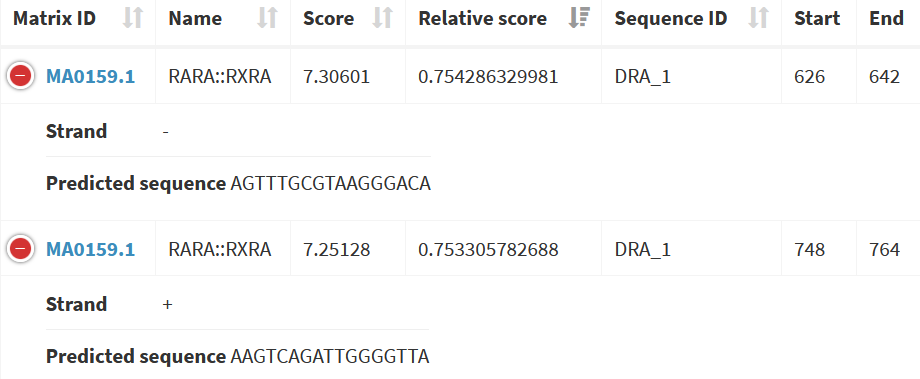

## HLA-DMA

### VDRE

In [29]:
HLADMA <- "3108"   #entrez geneID
DMA_seq <- transcriptsBy(TxDb.Hsapiens.UCSC.hg38.knownGene, by="gene")[HLADMA] #transcripts by gene
DMA_seq

GRangesList object of length 1:
$`3108`
GRanges object with 79 ranges and 2 metadata columns:
                  seqnames            ranges strand |     tx_id
                     <Rle>         <IRanges>  <Rle> | <integer>
   [1]                chr6 32948613-32949671      - |     77588
   [2]                chr6 32948613-32953061      - |     77589
   [3]                chr6 32948613-32953108      - |     77590
   [4]                chr6 32948613-32953108      - |     77591
   [5]                chr6 32948618-32953097      - |     77592
   ...                 ...               ...    ... .       ...
  [75] chr6_GL000256v2_alt   4347976-4369963      - |    238192
  [76] chr6_GL000256v2_alt   4348009-4367691      - |    238193
  [77] chr6_GL000256v2_alt   4348509-4351699      - |    238194
  [78] chr6_GL000256v2_alt   4348895-4368341      - |    238195
  [79] chr6_GL000256v2_alt   4349322-4352272      - |    238196
                 tx_name
             <character>
   [1] ENST00000480785.5

In [30]:
promoter_DMA <- getPromoterSeq(DMA_seq, Hsapiens, upstream=1000, downstream=100)
promoter_DMA

DNAStringSetList of length 1
[["3108"]] 3108=CCCAGAACACTCGGGTGCCTCGCCTGCCCGAATTTGCTGACTGGGCTCAGGAACAGGGAGA...

In [31]:
as.character(promoter_DMA[["3108"]])[1]

3108 
"CCCAGAACACTCGGGTGCCTCGCCTGCCCGAATTTGCTGACTGGGCTCAGGAACAGGGAGATGCTCCTGCCATTTTATTTGACAAAGAGTTCTGCGAGTGGATGATCCAGCAAATAGGGCCAAAACTTGATGGGAAAATCCCGGTGTCCAGAGGTCAGGAGTTTTCTGGGGAGTGAAGGGAGGAGGGCTGCATTAACCTCATTGATCTGTACACTGAATAATTCCCCTTGATACCAGCTCCCCATCTCAAATACTTTCTGGTTCTCTTCATCACCTTAATTTTTCCACCAGCCTTGGTCTGCACCCTGTGTTCTTTTGGTGGGCCGAAGTACCTAGCATGTAGTAGGCATTCAGAACTATGTATTGAATGTGATGAATTCAACAGGTACCAACTGATACCTACTGAATATTAACACTTGTGCTACTATGCCCAGCAAGATGGATGGGAAGAGTGGAAATATCTGATGACGTGACTATGTCTTAGTGAGAAGACAGTGCATGGTTAGACATCAATGTGAGCTCTAGACAGGAAGTGCTGAAGGAAGTCATGGTGGAGGGGTCCAGAGTAGCCTGGATCTGGCTCTGCTTCTATGTCTAGCTGCAGTCCTTGCCTGGAAGAAGACCTCCCTTCAGAGCCCAGCTCCTCGCTCATCTCTGTCTCCCAAAGCCTGACCCACTGTGTTCTTCTCTGCCCTCCCCTCCATATGCCATGGCCCCTCCAAACACAGAGATACCATCTAAACTAGTCTCTTTTTCCCCCTACACTTCAATCCCCCCACCAGGGTTTCCTATCGCTGAAGTGTTCACGCTGAAGCCCCTGGAGTTTGGCAAGCCCAACACTTTGGTCTGTTTTGTCAGTAATCTCTTCCCACCCATGCTGACAGTGAACTGGCAGCATCATTCCGTCCCTGTGGAAGGATTTGGGCCTACTTTTGTCTCAGCTGTCGATGGACTCAGCTTCCAGGCCTTTTCTTACTTAAACTTCACACCAGAACCTTCTGACATTTTCTCCTGCATTGTGACTCACGAAATTGACCGCTACACAGCAATTGCCTATTGGGGTGAGGCTTTCTCCCTGGAATTCTGGTCCTTTTGGGGGC"

In [33]:
scan_sequences(VDRE_PCM, unlist(promoter_DMA)[[1]], threshold = 0.001, threshold.type = 'pvalue', RC = TRUE)

DataFrame with 3 rows and 12 columns
        motif   motif.i    sequence     start      stop     score
  <character> <integer> <character> <integer> <integer> <numeric>
1       motif         1           1       152       166    -1.985
2       motif         1           1       376       390     3.198
3       motif         2           1       208       194     1.612
            match thresh.score min.score max.score         score.pct
      <character>    <numeric> <numeric> <numeric>         <numeric>
1 AGGTCAGGAGTTTTC      -3.3059    -93.53    24.097 -8.23753994273146
2 AATTCAACAGGTACC      -3.3059    -93.53    24.097  13.2713615802797
3 AGATCAATGAGGTTA      -3.3059    -93.53    24.097  6.68962941444993
       strand
  <character>
1           +
2           +
3           -

- JASPAR Validation **Relative Profile Score Threshold 75%**

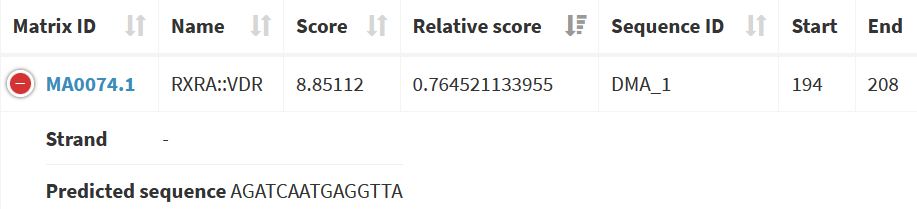

In [31]:
as.character(promoter_DMA[["3108"]])[2]

3108 
"TCTGCTAAGTAAAAGCAAGCTCCTCCTTGTGGCGTAGCAGGGCCCACGTGATCTGGCCCTTGCCAGAATTTGTAGCTTATCACAACATCCTTCTACCCCCCATTACCTCCTATTATACAGGAACACCCAAGCGACCTTCACAACATTCATATCAACTAGTACACAGGGTCTCCAAAGAGGACCTCTGGATGCCTGTGATCTTTGTACTTCTGCCTACCCTTTGCCCTGGCGTGTTTTTCTCTTCCTTCATGTTCTGCTGGCCAAATTGTTTTTCCTTCAAGTCTTAGGAGCCTGCCTGATTATGTTCCTCCTATTCCGCATCCTCATAAAATTACTGCGACTTCCAAAACACTTGGCACATTCTTATTTGAATACATTACATTGTTGTGTAATTATCCCTTGGCCCCCTCCCCCAGCACTAGACTCTAAGCTCTTTGAAGGCAGACTATGCCTATTCATCTTTGTATTTCTAGCCCTGGGCCCAACACCCAGAATTTCTTGTATTTTCAATATATGTCTGCCAAATGAATTAGAGCTAATGCCTGAAGGAGAATAAGTTTTTTTGAGAAAGAGGAAGAGCCAGGAGGGAGGAGAAGGCAGGGTCCGAAGAGCCCTGGGGGTTTACTTGGGGAAGATGCGGTTCCCCATTGCAGCATTCTGCCAGGAGGTGGCACTGCTCTGAAGAGCCAGCTGGTCGCTTACAGACTGAGGCTGACAGCTTGAAACCAAAGAGGGAACTCCACCAGGAAGCAACATTCCTCCACTGGGCTTCCCAGCCCAGTTACATGCCATACTCTGCCCTGGTCAAACAGCCAAGTCTTCAGGAGGTTACTGGCCCCAGGCGTCTCCCCAGTGACTGATGATGTTAAACCCTACGCTTCTCTGATTGGTTTAGACAAAATGACAAGGGCACCTATTGGAAATGATCTGGCAAAACATGATCTAAGGCCACCCTCTCGGGGAGGGAGTTGGGGAAGCTGGGTTGGCTGGGTTGGTAGCTCCTACCTACTGTGTGGCAAGAAGGTATGGGTCATGAACAGAACCAAGGAGCTGCGCTGCTACAGATGTTACCACTTCTGTGGCTGCTACCCCACTCCTGG"

In [35]:
scan_sequences(VDRE_PCM, unlist(promoter_DMA)[[2]], threshold = 0.001, threshold.type = 'pvalue', RC = TRUE)

DataFrame with 2 rows and 12 columns
        motif   motif.i    sequence     start      stop     score
  <character> <integer> <character> <integer> <integer> <numeric>
1       motif         1           1       981       995    -2.941
2       motif         2           1       227       213    -0.182
            match thresh.score min.score max.score          score.pct
      <character>    <numeric> <numeric> <numeric>          <numeric>
1 GGTTGGCTGGGTTGG      -3.3645    -93.53    24.097  -12.2048387766112
2 AGGGCAAAGGGTAGG      -3.3645    -93.53    24.097 -0.755280740341121
       strand
  <character>
1           +
2           -

- JASPAR Validaion **Relative Profile Score Threshold 70%**

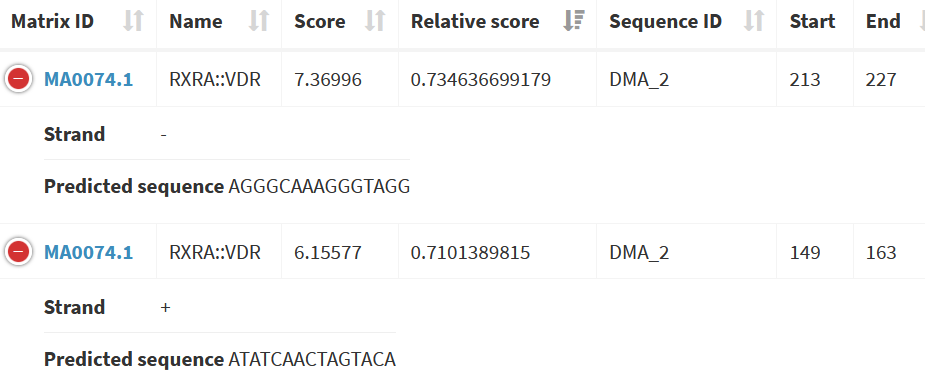

### RARE

In [37]:
as.character(promoter_DMA[["3108"]])[1]

3108 
"CCCAGAACACTCGGGTGCCTCGCCTGCCCGAATTTGCTGACTGGGCTCAGGAACAGGGAGATGCTCCTGCCATTTTATTTGACAAAGAGTTCTGCGAGTGGATGATCCAGCAAATAGGGCCAAAACTTGATGGGAAAATCCCGGTGTCCAGAGGTCAGGAGTTTTCTGGGGAGTGAAGGGAGGAGGGCTGCATTAACCTCATTGATCTGTACACTGAATAATTCCCCTTGATACCAGCTCCCCATCTCAAATACTTTCTGGTTCTCTTCATCACCTTAATTTTTCCACCAGCCTTGGTCTGCACCCTGTGTTCTTTTGGTGGGCCGAAGTACCTAGCATGTAGTAGGCATTCAGAACTATGTATTGAATGTGATGAATTCAACAGGTACCAACTGATACCTACTGAATATTAACACTTGTGCTACTATGCCCAGCAAGATGGATGGGAAGAGTGGAAATATCTGATGACGTGACTATGTCTTAGTGAGAAGACAGTGCATGGTTAGACATCAATGTGAGCTCTAGACAGGAAGTGCTGAAGGAAGTCATGGTGGAGGGGTCCAGAGTAGCCTGGATCTGGCTCTGCTTCTATGTCTAGCTGCAGTCCTTGCCTGGAAGAAGACCTCCCTTCAGAGCCCAGCTCCTCGCTCATCTCTGTCTCCCAAAGCCTGACCCACTGTGTTCTTCTCTGCCCTCCCCTCCATATGCCATGGCCCCTCCAAACACAGAGATACCATCTAAACTAGTCTCTTTTTCCCCCTACACTTCAATCCCCCCACCAGGGTTTCCTATCGCTGAAGTGTTCACGCTGAAGCCCCTGGAGTTTGGCAAGCCCAACACTTTGGTCTGTTTTGTCAGTAATCTCTTCCCACCCATGCTGACAGTGAACTGGCAGCATCATTCCGTCCCTGTGGAAGGATTTGGGCCTACTTTTGTCTCAGCTGTCGATGGACTCAGCTTCCAGGCCTTTTCTTACTTAAACTTCACACCAGAACCTTCTGACATTTTCTCCTGCATTGTGACTCACGAAATTGACCGCTACACAGCAATTGCCTATTGGGGTGAGGCTTTCTCCCTGGAATTCTGGTCCTTTTGGGGGC"

In [39]:
scan_sequences(RARE_PCM, unlist(promoter_DMA)[[1]], threshold = 0.001, threshold.type = 'pvalue', RC = TRUE)

DataFrame with 2 rows and 12 columns
        motif   motif.i    sequence     start      stop     score
  <character> <integer> <character> <integer> <integer> <numeric>
1       motif         1           1        77        93     4.088
2       motif         2           1       954       938     6.774
              match thresh.score min.score max.score        score.pct
        <character>    <numeric> <numeric> <numeric>        <numeric>
1 ATTTGACAAAGAGTTCT        3.153   -80.909    23.633 17.2978462319638
2 AGTCCATCGACAGCTGA        3.153   -80.909    23.633 28.6633097786993
       strand
  <character>
1           +
2           -

- JASPAR Validation **Relative Profile Score Threshold 80%**

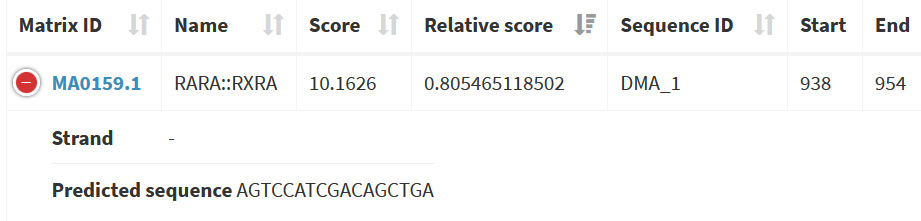

In [38]:
as.character(promoter_DMA[["3108"]])[2]

3108 
"TCTGCTAAGTAAAAGCAAGCTCCTCCTTGTGGCGTAGCAGGGCCCACGTGATCTGGCCCTTGCCAGAATTTGTAGCTTATCACAACATCCTTCTACCCCCCATTACCTCCTATTATACAGGAACACCCAAGCGACCTTCACAACATTCATATCAACTAGTACACAGGGTCTCCAAAGAGGACCTCTGGATGCCTGTGATCTTTGTACTTCTGCCTACCCTTTGCCCTGGCGTGTTTTTCTCTTCCTTCATGTTCTGCTGGCCAAATTGTTTTTCCTTCAAGTCTTAGGAGCCTGCCTGATTATGTTCCTCCTATTCCGCATCCTCATAAAATTACTGCGACTTCCAAAACACTTGGCACATTCTTATTTGAATACATTACATTGTTGTGTAATTATCCCTTGGCCCCCTCCCCCAGCACTAGACTCTAAGCTCTTTGAAGGCAGACTATGCCTATTCATCTTTGTATTTCTAGCCCTGGGCCCAACACCCAGAATTTCTTGTATTTTCAATATATGTCTGCCAAATGAATTAGAGCTAATGCCTGAAGGAGAATAAGTTTTTTTGAGAAAGAGGAAGAGCCAGGAGGGAGGAGAAGGCAGGGTCCGAAGAGCCCTGGGGGTTTACTTGGGGAAGATGCGGTTCCCCATTGCAGCATTCTGCCAGGAGGTGGCACTGCTCTGAAGAGCCAGCTGGTCGCTTACAGACTGAGGCTGACAGCTTGAAACCAAAGAGGGAACTCCACCAGGAAGCAACATTCCTCCACTGGGCTTCCCAGCCCAGTTACATGCCATACTCTGCCCTGGTCAAACAGCCAAGTCTTCAGGAGGTTACTGGCCCCAGGCGTCTCCCCAGTGACTGATGATGTTAAACCCTACGCTTCTCTGATTGGTTTAGACAAAATGACAAGGGCACCTATTGGAAATGATCTGGCAAAACATGATCTAAGGCCACCCTCTCGGGGAGGGAGTTGGGGAAGCTGGGTTGGCTGGGTTGGTAGCTCCTACCTACTGTGTGGCAAGAAGGTATGGGTCATGAACAGAACCAAGGAGCTGCGCTGCTACAGATGTTACCACTTCTGTGGCTGCTACCCCACTCCTGG"

In [42]:
scan_sequences(RARE_PCM, unlist(promoter_DMA)[[2]], threshold = 0.001, threshold.type = 'pvalue', RC = TRUE)

DataFrame with 2 rows and 12 columns
        motif   motif.i    sequence     start      stop     score
  <character> <integer> <character> <integer> <integer> <numeric>
1       motif         2           1       108        92     4.981
2       motif         2           1       157       141      3.83
              match thresh.score min.score max.score        score.pct
        <character>    <numeric> <numeric> <numeric>        <numeric>
1 AGGTAATGGGGGGTAGA       3.3312   -80.909    23.633 21.0764608809715
2 AGTTGATATGAATGTTG       3.3312   -80.909    23.633 16.2061524139974
       strand
  <character>
1           -
2           -

- JASPAR Validation **Relative Profile Score Threshold 75%**

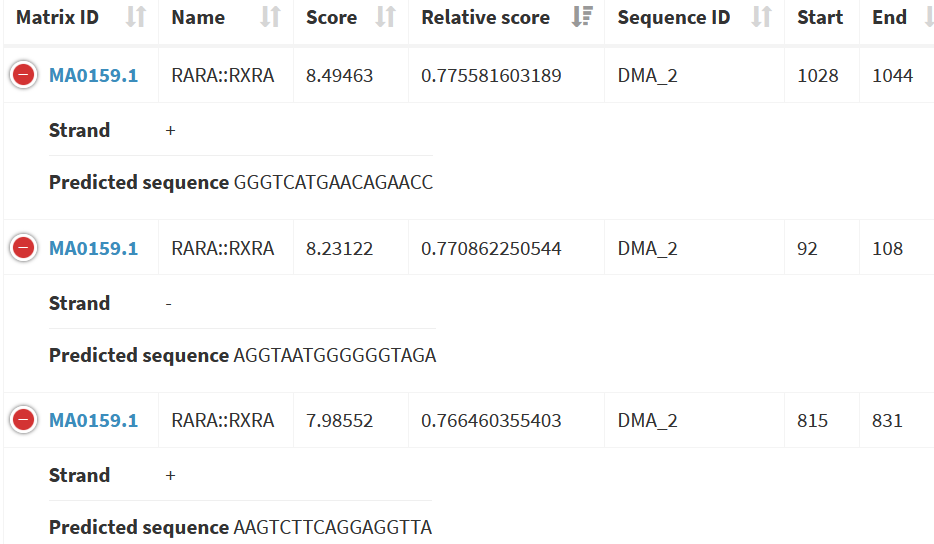

## Ii (CD74)

### VDRE

In [43]:
CD74 <- "972"   #entrez geneID
CD74_seq <- transcriptsBy(TxDb.Hsapiens.UCSC.hg38.knownGene, by="gene")[CD74] #transcripts by gene
CD74_seq

GRangesList object of length 1:
$`972`
GRanges object with 12 ranges and 2 metadata columns:
       seqnames              ranges strand |     tx_id            tx_name
          <Rle>           <IRanges>  <Rle> | <integer>        <character>
   [1]     chr5 150400041-150412751      - |     69727 ENST00000009530.12
   [2]     chr5 150401637-150412769      - |     69728  ENST00000377795.7
   [3]     chr5 150401670-150412929      - |     69729 ENST00000353334.10
   [4]     chr5 150401699-150412732      - |     69730  ENST00000518797.5
   [5]     chr5 150401864-150412751      - |     69731  ENST00000524315.5
   ...      ...                 ...    ... .       ...                ...
   [8]     chr5 150404664-150412751      - |     69734  ENST00000522246.5
   [9]     chr5 150405316-150412751      - |     69735  ENST00000523813.1
  [10]     chr5 150405978-150412751      - |     69736  ENST00000523836.5
  [11]     chr5 150406039-150412912      - |     69737  ENST00000517791.1
  [12]     chr5 150

In [44]:
promoter_CD74 <- getPromoterSeq(CD74_seq, Hsapiens, upstream=1000, downstream=100)
promoter_CD74

DNAStringSetList of length 1
[["972"]] 972=CGTGCCTGGCACGAAGGAGAGCTTGGTAAGTGGAGGCAAGTCTGAGTGCCAGAGCCTTAAAAC...

In [62]:
scan_sequences(VDRE_PCM, unlist(promoter_CD74)[[1]], threshold = 0.001, threshold.type = 'pvalue', RC = TRUE)

No hits found.


DataFrame with 0 rows and 12 columns

### RARE

In [65]:
as.character(promoter_CD74[["972"]])[1]

972 
"CGTGCCTGGCACGAAGGAGAGCTTGGTAAGTGGAGGCAAGTCTGAGTGCCAGAGCCTTAAAACCATGGACTCTTAGGTTTGAAGGAAATCAAAATATTCCTCTCTAAAAACCTGCGGATTTTAGTTAAAGGTAAAAGGTTAAAACCCAGGGGCACCCTCTGCCCCTTCTCTCTGTCTTGATCAGCTCAGAAGCAGAGCTCAGAGGATCCTGGATCAGACTTGACTGTTCCCATACATTCACCTTCCCACATTTCCAGCCCTTTGGAACCCTGAAGATATCCTCTTCTCTGTCCTGTCACTCTATGGGACTTACGGCTCTTTGTTAAAATACTATTTAAGCAAGGCCCCTAAGCCACTGCCTTGAGAGAGAAATACTTCTCAACTGAGGCCTCTACTGCATAATGGGTACAGCATGTGTTAATCAACTTTGGCTGATTTTTCTTTTGTTAAGTTGACTTTTGTTTCCAGGGGAGCGTGTCAACTAAGAACCTAAACAGGGAAAGAAAAGAAATGTTTTCACCCCTGCACGTCGTCCAAACTTCCTCCTGCGTGTTTGAGACGACATAACGGAGGCCAGAGAAGAGGACTTGTCTGAGCTCACCAAGGGTGCACAGCCCCTTTCTGCACCCACTCATCTGTGGATGAGAAGGGGAGACAAACAAAGGTGTCTTCTGTTTCAAAGTGCTTTCCTGTCTAGGGAGTGGACATTTGCCTGTTTCTTGAAACATTCAAAGAGCCTTATGAATCCAAAGGCCTGCCCAGAAACAAGTGATGAGGGCCCTGGGCAGCCAATGGGATCGTGCTGGCCTTTCTACCTGCCTGGGGAGCCCCCCCGCCCCACATCCTGCCCCGCAAAAGGCAGCTTCACCAAAGTGGGGTATTTCCAGCCTTTGTAGCTTTCACTTCCACATCTACCAAGTGGGCGGAGTGGCCTTCTGTGGACGAATCAGATTCCTCTCCAGCACCGACTTTAAGAGGCGAGCCGGGGGGTCAGGGTCCCAGATGCACAGGAGGAGAAGCAGGAGCTGTCGGGAAGATCAGAAGCCAGTCATGGATGACCAGCGCGACCTTATCTCCAACAATGAGCAACTGCCCATGCT"

In [64]:
scan_sequences(RARE_PCM, unlist(promoter_CD74)[[1]], threshold = 0.001, threshold.type = 'pvalue', RC = TRUE)

DataFrame with 4 rows and 12 columns
        motif   motif.i    sequence     start      stop     score
  <character> <integer> <character> <integer> <integer> <numeric>
1       motif         1           1       595       611     8.132
2       motif         1           1      1035      1051     8.686
3       motif         2           1       438       422     3.972
4       motif         2           1       540       524     4.177
              match thresh.score min.score max.score        score.pct
        <character>    <numeric> <numeric> <numeric>        <numeric>
1 AGCTCACCAAGGGTGCA       3.4433   -80.909    23.633  34.409512122879
2 AGATCAGAAGCCAGTCA       3.4433   -80.909    23.633 36.7536918715356
3 AAATCAGCCAAAGTTGA       3.4433   -80.909    23.633 16.8070071510176
4 AGTTTGGACGACGTGCA       3.4433   -80.909    23.633 17.6744382854483
       strand
  <character>
1           +
2           +
3           -
4           -

- JASPAR Validation **Relative Profile Score Threshold 80%**

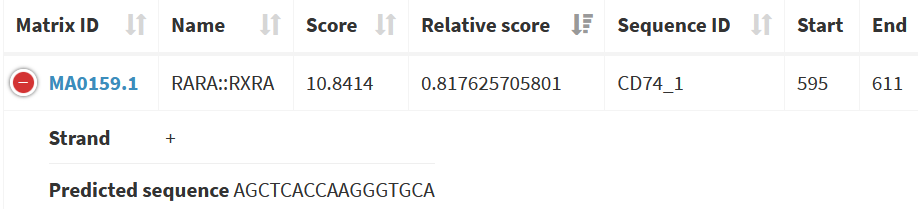

## CTSD

### VDRE

In [66]:
CTSD <- "1509"   #entrez geneID
CTSD_seq <- transcriptsBy(TxDb.Hsapiens.UCSC.hg38.knownGene, by="gene")[CTSD] #transcripts by gene
CTSD_seq

GRangesList object of length 1:
$`1509`
GRanges object with 17 ranges and 2 metadata columns:
       seqnames          ranges strand |     tx_id           tx_name
          <Rle>       <IRanges>  <Rle> | <integer>       <character>
   [1]    chr11 1734821-1763954      - |    123916 ENST00000636615.1
   [2]    chr11 1744359-1763932      - |    123919 ENST00000636397.1
   [3]    chr11 1747747-1757452      - |    123920 ENST00000427721.3
   [4]    chr11 1752755-1763927      - |    123922 ENST00000236671.7
   [5]    chr11 1752768-1763906      - |    123923 ENST00000637815.1
   ...      ...             ...    ... .       ...               ...
  [13]    chr11 1753383-1754946      - |    123931 ENST00000429746.1
  [14]    chr11 1753799-1755348      - |    123932 ENST00000497544.2
  [15]    chr11 1754024-1761540      - |    123933 ENST00000438213.5
  [16]    chr11 1757324-1762403      - |    123934 ENST00000367196.3
  [17]    chr11 1759052-1764573      - |    123935 ENST00000637381.1
  -------

In [67]:
promoter_CTSD <- getPromoterSeq(CTSD_seq, Hsapiens, upstream=1000, downstream=100)
promoter_CTSD

DNAStringSetList of length 1
[["1509"]] 1509=TATATATATATACATACGTGTGTGTATATATACATATTAGCCAGGCGTGGTAGCACGCGCC...

In [69]:
as.character(promoter_CTSD[["1509"]])[1]

1509 
"TATATATATATACATACGTGTGTGTATATATACATATTAGCCAGGCGTGGTAGCACGCGCCTGTAATCCCAGCTACTTAGGAGGCTGAGGCAGGAGAATCGCTTGAACCCAGGAGGTAGAGGTTGCAGTGAGCCGAGATCATGCCACTGCACTCCAGCCTGGGCCACAGAGCGAGATTCTGTCTCAAAAAAAAAAAAAAAAAAAAAAGAGTTGACGTGAGTGGACAAAAGGTGCCCGACCTCCTAAGGGAAGGAGCTTCTCTAGAAAACGCGAATTTCGCCCCCTCAAGAGACAGCTGTGCAGTGCCATATCAAAACATGTGAAAGGAATGTATTTTAGGGTGGAATACTTTGCCTGCCTTCGGGCCTGCTGTCTGCCACGTGAGGCTGTGCCAGTGTGAGGCTGGAATTTGGGATCTGGAGGCTAGAGCCATCGGTGAGGCCTGAGTCTCTAAGCACAGCGCCCAGAGGGAGAGGGCGGAGCGGGTCCGACCCCCTTTGCGGCAGGGCCTGAGCTGGTTTTCCAGGTTTCTCTGGAAGCCCTGTAGAGGAGCGGAGGGTCCATTCGGTGGGCTGGGGACTTTGAATTTAACCTTGGTTTGCAAGAGGCTTCCAGAGAGGATGTCTGGGAGCGTCTCGGAGGGGGACGAGGGGGCGCCGGGAGGAGCAGGTGCAGGAGCCCACGGCGCAGCGCCCCGCGCAGGCCTGGACGCGGGGACGGCCGCGGCGGCCGGGACAGGGGTCACCCCGCGGGGCCCTCCAGGGTGGGCCGCCCCACGACCCCAGGCCAGGCCGAAACGGGAATCCTCCAGACCCCAGAAGCTGGGCCGGGCTGACCCCGCGGGCGCGAGCGGCGGGAACTGTAGGCGCGGCAGGCGCACCACCACCCCGCCCCCCGCCCGGGCGCTGTGCGCGTGCGCCGAGGTTGCCCCGCCCAGGCCAGGCCCCGCTCCGCCCCGCCCCGCGCACGCCGGCCGCGCCCACGTGACCGGTCCGGGTGCAAACACGCGGGTCAGCTGATCCGGCCCAACTGCGGCGTCATCCCGGCTATAAGCGCACGGCCTCGGCGACCCTCTCCGACCCGGCCGCCGCCGCCATGCA"

In [72]:
scan_sequences(VDRE_PCM, unlist(promoter_CTSD)[[1]], threshold = 0.001, threshold.type = 'pvalue', RC = TRUE)

DataFrame with 2 rows and 12 columns
        motif   motif.i    sequence     start      stop     score
  <character> <integer> <character> <integer> <integer> <numeric>
1       motif         1           1       517       531     0.439
2       motif         2           1      1072      1058     1.034
            match thresh.score min.score max.score        score.pct      strand
      <character>    <numeric> <numeric> <numeric>        <numeric> <character>
1 GGTTTTCCAGGTTTC      -3.5515    -93.53    24.097 1.82180354400963           +
2 GGGTCGCCGAGGCCG      -3.5515    -93.53    24.097 4.29099057974022           -

- JASPAR Validation **Relative Profile Score Threshold 75%**

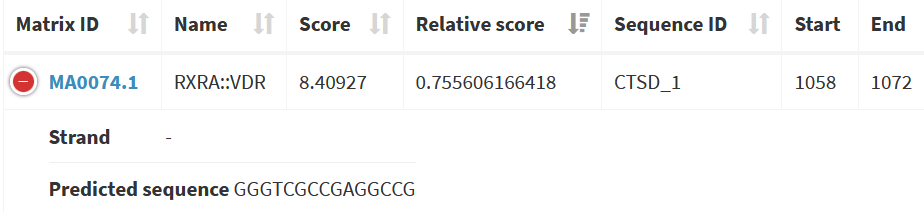

### RARE

In [88]:
as.character(promoter_CTSD[["1509"]])[1]

1509 
"TATATATATATACATACGTGTGTGTATATATACATATTAGCCAGGCGTGGTAGCACGCGCCTGTAATCCCAGCTACTTAGGAGGCTGAGGCAGGAGAATCGCTTGAACCCAGGAGGTAGAGGTTGCAGTGAGCCGAGATCATGCCACTGCACTCCAGCCTGGGCCACAGAGCGAGATTCTGTCTCAAAAAAAAAAAAAAAAAAAAAAGAGTTGACGTGAGTGGACAAAAGGTGCCCGACCTCCTAAGGGAAGGAGCTTCTCTAGAAAACGCGAATTTCGCCCCCTCAAGAGACAGCTGTGCAGTGCCATATCAAAACATGTGAAAGGAATGTATTTTAGGGTGGAATACTTTGCCTGCCTTCGGGCCTGCTGTCTGCCACGTGAGGCTGTGCCAGTGTGAGGCTGGAATTTGGGATCTGGAGGCTAGAGCCATCGGTGAGGCCTGAGTCTCTAAGCACAGCGCCCAGAGGGAGAGGGCGGAGCGGGTCCGACCCCCTTTGCGGCAGGGCCTGAGCTGGTTTTCCAGGTTTCTCTGGAAGCCCTGTAGAGGAGCGGAGGGTCCATTCGGTGGGCTGGGGACTTTGAATTTAACCTTGGTTTGCAAGAGGCTTCCAGAGAGGATGTCTGGGAGCGTCTCGGAGGGGGACGAGGGGGCGCCGGGAGGAGCAGGTGCAGGAGCCCACGGCGCAGCGCCCCGCGCAGGCCTGGACGCGGGGACGGCCGCGGCGGCCGGGACAGGGGTCACCCCGCGGGGCCCTCCAGGGTGGGCCGCCCCACGACCCCAGGCCAGGCCGAAACGGGAATCCTCCAGACCCCAGAAGCTGGGCCGGGCTGACCCCGCGGGCGCGAGCGGCGGGAACTGTAGGCGCGGCAGGCGCACCACCACCCCGCCCCCCGCCCGGGCGCTGTGCGCGTGCGCCGAGGTTGCCCCGCCCAGGCCAGGCCCCGCTCCGCCCCGCCCCGCGCACGCCGGCCGCGCCCACGTGACCGGTCCGGGTGCAAACACGCGGGTCAGCTGATCCGGCCCAACTGCGGCGTCATCCCGGCTATAAGCGCACGGCCTCGGCGACCCTCTCCGACCCGGCCGCCGCCGCCATGCA"

In [80]:
scan_sequences(RARE_PCM, unlist(promoter_CTSD)[[1]], threshold = 0.001, threshold.type = 'pvalue', RC = TRUE)

DataFrame with 1 row and 12 columns
        motif   motif.i    sequence     start      stop     score
  <character> <integer> <character> <integer> <integer> <numeric>
1       motif         2           1       931       915     3.885
              match thresh.score min.score max.score       score.pct
        <character>    <numeric> <numeric> <numeric>       <numeric>
1 GGGGCAACCTCGGCGCA       3.3717   -80.909    23.633 16.438877840308
       strand
  <character>
1           -

- JASPAR Validation **Relative Profile Score Threshold 75%**

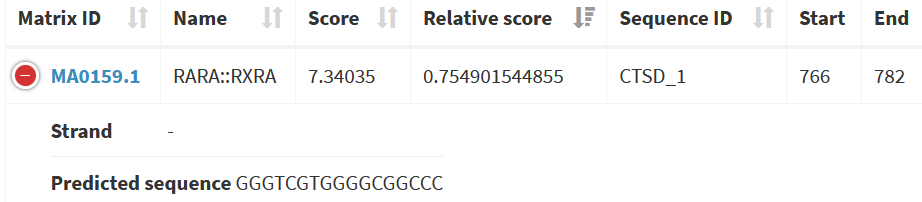

## CIITA

### VDRE

In [95]:
CIITA <- "4261"   #entrez geneID
CIITA_seq <- transcriptsBy(TxDb.Hsapiens.UCSC.hg38.knownGene, by="gene")[CIITA] #transcripts by gene
CIITA_seq

GRangesList object of length 1:
$`4261`
GRanges object with 15 ranges and 2 metadata columns:
       seqnames            ranges strand |     tx_id            tx_name
          <Rle>         <IRanges>  <Rle> | <integer>        <character>
   [1]    chr16 10866222-10902104      + |    165127  ENST00000637439.1
   [2]    chr16 10866260-10901564      + |    165128  ENST00000636238.1
   [3]    chr16 10877198-10924983      + |    165129  ENST00000618207.4
   [4]    chr16 10877198-10924983      + |    165130  ENST00000618327.4
   [5]    chr16 10877198-10936388      + |    165131 ENST00000324288.13
   ...      ...               ...    ... .       ...                ...
  [11]    chr16 10878969-10902160      + |    165137  ENST00000576601.1
  [12]    chr16 10915646-10917010      + |    165139  ENST00000572665.1
  [13]    chr16 10922167-10936388      + |    165140  ENST00000646979.1
  [14]    chr16 10922167-10943021      + |    165141  ENST00000644232.1
  [15]    chr16 10922925-10923992      + |

In [96]:
promoter_CIITA <- getPromoterSeq(CIITA_seq, Hsapiens, upstream=1000, downstream=100)
promoter_CIITA

DNAStringSetList of length 1
[["4261"]] 4261=TTCGTTAAGTGCTTACTAGGTCCAGTGTAGAGACCCTTAAATGCATATGAGCTTCGATTGC...

In [101]:
as.character(promoter_CIITA[["4261"]])[3]

4261 
"AGACATAGGGTGTCACTATGTTGCCCAGGCTAGCCTCCAACTCCCGGCTTCAAGCAATCCTCCTGCTTCGGCCTCCCAAAATGTTGGAATTACAGGCACAAGCCACCTGGCCCAGCCATCTACTTTATATTCAAATAAAACTTTACGTCCCATTATAAAGGGAAAAAATGGCAAAAACAGGAGGTAACCATTTAACAAGAAAGCAGAGTGATGTTAGATTATAGCAAGATACTGTTGACTGTAGAAGGCTCTGAGGCTAGAGAGCTGCTTTCTATAAAACAGAGTGATCATATATTAGAAGAGGTGTTAAAGACATGTTCACACCAAGCTGAGACTTCCTCCTTGATACCACCAGGAGGATGGGCAGAGACTGGAAAAGACACTAACTTTCTCCCTATGGGAGTCAGTATTATTTAGCATCACTTTGGCGGGTCACCCCAAACCATCTGACTACAAGGGTACCATATTTGGGTTAACACTCTTTTGGTATAATTTATGTTTTAGTCCAATGTCTTGGGATGAAAATGACAGGTGGGCCACTTATGATCTCCAGAGAAATTCAGGGCAATTTGGTGTGGGAGTAGGCATGGTAGAGGAGAGCAGCATCTAAGAAGTCCCCAGCAGAGGCTCTCAGCTTGTCTTGAGGCATCTGGGCGGAGGGCTATGATACTGGCCCCATCCTGCAGAAGGTGGCAGATATTGGCAGCTGGCACCAGTGCGGTTCCATTGTGATCATCATTTCTGAACGTCAGACTGTTGAAGGTTCCCCCAACAGACTTTCTGTGCAACTTTCTGTCTTCACCAAATTCAGTCCACAGTAAGGAAGTGAAATTAATTTCAGAGGTGTGGGGAGGGCTTAAGGGAGTGTGGTAAAATTAGAGGGTGTTCAGAAACAGAAATCTGACCGCTTGGGGCCACCTTGCAGGGAGAGTTTTTTTGATGATCCCTCACTTGTTTCTTTGCATGTTGGCTTAGCTTGGCGGGCTCCCAACTGGTGACTGGTTAGTGATGAGGCTAGTGATGAGGCTGTGTGCTTCTGAGCTGGGCATCCGAAGGCATCCTTGGGGAAGCTGAGGGCACGAGGAGGGGCTGCCAGACTC"

In [103]:
scan_sequences(VDRE_PCM, unlist(promoter_CIITA)[[3]], threshold = 0.001, threshold.type = 'pvalue', RC = TRUE)

DataFrame with 1 row and 12 columns
        motif   motif.i    sequence     start      stop     score
  <character> <integer> <character> <integer> <integer> <numeric>
1       motif         2           1       151       137    -1.934
            match thresh.score min.score max.score         score.pct
      <character>    <numeric> <numeric> <numeric>         <numeric>
1 GGGACGTAAAGTTTT      -3.3524    -93.53    24.097 -8.02589533966884
       strand
  <character>
1           -

- JASPAR Motif **Relative Profile Score Threshold 70%**

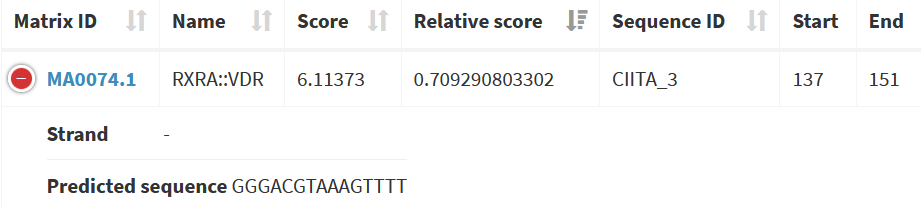

### RARE

In [109]:
as.character(promoter_CIITA[["4261"]])[1]

4261 
"TTCGTTAAGTGCTTACTAGGTCCAGTGTAGAGACCCTTAAATGCATATGAGCTTCGATTGCTTTTAGTGGGAAATTTTGCAGAGGAGGAGACTGAGGATTTGTGAGGTTAAACTCAGGGTGATAGTAATTTGCATGATTAATCAATAATAATGATGGTTCATATTTATTGTATTATTATCATGTTGTAGATAATGCACTAGGGACTCTATTTATGTTATCTCATTTAATCCTCCCAACAACCCTATCATGTAAGTACTGTTAACAGAGACTAAAAATGCTAAGTAAGGCAGGCGTGGTGGCTCACACTTGTAATCCCAGTACTTTGGGAGACTGAGGCAAGAGGATCACTTGAGCCCAGGAATTCAAGACCAGCCTGGGAAACAGAGTGAGACCCTGTCTCTACTAAAAATAAAAAAATAAAAAATTAGCGGGGCATGATGGTGTGAGTCTGTAGTCCCAGCTACTGGGAAACAGAGATGGGAGGTTTGTTTGAGCCTGGGAAGTTGAGGCTGCAGTGAGTTATGATCACGCCACTGCACACCAGCCTGGGCAACAGAGCAAGACCCTGTCAAAAAAAAAAAAAAGGCTATGTAACATGCCCAAAGTCACATAATTGGCAAGGAGCAGCAGATCTGGGACTTGAACATAGGCAGATTAGCTCCAAGCCTATTTGCTTAACCTCTATACCACAATGCCTTCTTGCTATGGTAAAACATCTGAAAAGACCTATTACCCTATAGGTCCTCTAAGGAGGCATGTCGCCTTCCTCTTAGCAATACTAGATTGGCTCCAACAGAAGGCTGTGGGCTTCTCTGGCACATGCACCTGGGTAGGACCCAGAGAATATCTGTGGAGTCTGAATCAACCCAAAAGCCAATATCCATCCGTTCATCAGGAACCCCAGCCTACAACGCAAAAGAGGAAATCTTCCTAAGTAGAAATAAACTGTAATAAATTGCAGAGGTTCCCTCGTCCTGGTTTTCACTTCATGTTTTGGATGCTGCATGCTGGGTGAGCGGAGATTCCAGGCACTGGCCAGGGCAGCTGCCCTGACTCCAAGGGCTGCCATGAACAACTTCCAGGCCATCCTGACTCAGGT"

In [105]:
scan_sequences(RARE_PCM, unlist(promoter_CIITA)[[1]], threshold = 0.001, threshold.type = 'pvalue', RC = TRUE)

DataFrame with 4 rows and 12 columns
        motif   motif.i    sequence     start      stop     score
  <character> <integer> <character> <integer> <integer> <numeric>
1       motif         1           1       105       121     3.847
2       motif         1           1       431       447      5.88
3       motif         1           1       503       519     6.581
4       motif         2           1       868       852     5.756
              match thresh.score min.score max.score        score.pct
        <character>    <numeric> <numeric> <numeric>        <numeric>
1 AGGTTAAACTCAGGGTG       3.3197   -80.909    23.633 16.2780857275843
2 GGGGCATGATGGTGTGA       3.3197   -80.909    23.633 24.8804637583041
3 AGTTGAGGCTGCAGTGA       3.3197   -80.909    23.633 27.8466551009182
4 GGTTGATTCAGACTCCA       3.3197   -80.909    23.633 24.3557737062582
       strand
  <character>
1           +
2           +
3           +
4           -

- JASPAR Validation **Relative Profile Score Threshold 75%**

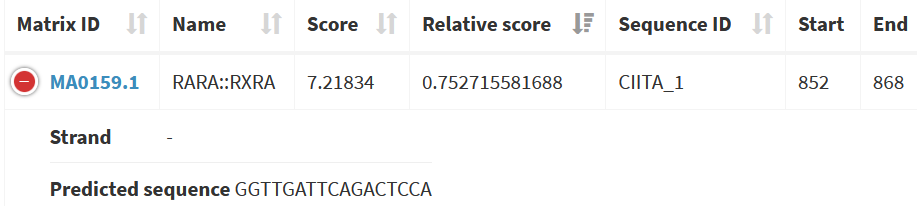

## MARCH1

### VDRE

In [8]:
MARCH1 <- "55016"   #entrez geneID
MARCH1_seq <- transcriptsBy(TxDb.Hsapiens.UCSC.hg38.knownGene, by="gene")[MARCH1] #transcripts by gene
MARCH1_seq

GRangesList object of length 1:
$`55016`
GRanges object with 15 ranges and 2 metadata columns:
       seqnames              ranges strand |     tx_id            tx_name
          <Rle>           <IRanges>  <Rle> | <integer>        <character>
   [1]     chr4 163524298-163854178      - |     59467 ENST00000274056.11
   [2]     chr4 163524718-164384050      - |     59468  ENST00000503008.5
   [3]     chr4 163526971-164384035      - |     59469  ENST00000514618.5
   [4]     chr4 163527121-163613534      - |     59470  ENST00000339875.9
   [5]     chr4 163528650-163613513      - |     59471  ENST00000510786.1
   ...      ...                 ...    ... .       ...                ...
  [11]     chr4 163700836-164135497      - |     59477  ENST00000503104.5
  [12]     chr4 163988543-164383517      - |     59479  ENST00000508725.5
  [13]     chr4 163988546-164383953      - |     59480  ENST00000505391.5
  [14]     chr4 163988581-164383566      - |     59481  ENST00000515471.5
  [15]     chr4 1

In [107]:
promoter_MARCH1 <- getPromoterSeq(MARCH1_seq, Hsapiens, upstream=1000, downstream=100)
promoter_MARCH1

DNAStringSetList of length 1
[["55016"]] 55016=CTTGAGTATTTTGTCATTTAGATTAATAACTCAGAAATCTGTTAGTGCAACCGTTCTTA...

In [108]:
as.character(promoter_MARCH1[["55016"]])[1]

55016 
"CTTGAGTATTTTGTCATTTAGATTAATAACTCAGAAATCTGTTAGTGCAACCGTTCTTATGTTACTTTTCTTAGTGCTATGAAATGTGCAGTTTTGAATCTCTGAAATGTTATAAATGACCAGATTGCTAATTGCTTTGGATGCTGTGAAAAATAATTACTCCACATTATTTTTGATATTTAATTGACAGTGTAATGCATTTAACTAAAGACCTGCAATAAACTATTTCTAATTACTGAGGGTGGTGGAGTGGAAAAGTAGGCTGTAAAACTTTACAGGGGAAACAATGTTTCTCCATTATGTTAAAAGTCATTGTTGATATGACTTTTTCAGAGACAAAACATTCCCCCAAATAAGAAGTTCTAGAAGTCTAGAAAGAGTTGTGGAATATTTCTACTCATGACATAGTAAGGATTGTTTTAAATTATTACTTTTGAATAGATTGTACTGGTGATAGATGTCATATACTTAATTTATTATACTTGCAGTAAATTTTTTTTCAGATGGCAGAACTTTATAAGAGAGAAAATCATGGCACTGCCAGAATGAGTAATATTTGTCACTGGCCTGTATTCGATTTATTCGGCTTCTGTAGGACATTTAGCTGAAAAGCTATGCCAAATTTTAGATGTCATTGAAATATGTAGATATTATCAGGAACCAGGTCTATTCTTATTTCTTGAAGTAAGGACTTACTGTTATAAGCTGATCTCTGAAAATAACACTTAGAACCTGGCACAAGGAATTCTCATTGTCTACTAGTGTCACAAAGAGAGATATAAAAGATGTTAGGCCCTTTGAAAAGATGTATACTCTTTCTATTGTCCTGTGACTCTAGGATATTAGTAATAATCAGCATATTCTTCTTTTCCTCCTTGTAACCCCTGGTTTTTTTAAAAAAGTCTCAATTAGTGTTTTGTTATATTGTTGATTTAATTTTGATTATATGTATTTTCCAAAACACAGCTAAAATAAGTGACCTGTTTCAGGGAATGTAAATTATTTTCAGAATTTCAGAAATTGAAAAGGGATAAGAGGAAGGAGAAAATGCTGGGCTGGTGTGAAGCGATAGCCCGTAACCCTCACAGAATTCCAAACAA"

In [112]:
scan_sequences(VDRE_PCM, unlist(promoter_MARCH1)[[1]], threshold = 0.001, threshold.type = 'pvalue', RC = TRUE)

DataFrame with 2 rows and 12 columns
        motif   motif.i    sequence     start      stop     score
  <character> <integer> <character> <integer> <integer> <numeric>
1       motif         2           1       982       968     0.791
2       motif         2           1      1082      1068     1.283
            match thresh.score min.score max.score        score.pct      strand
      <character>    <numeric> <numeric> <numeric>        <numeric> <character>
1 AGGTCACTTATTTTA      -3.2627    -93.53    24.097 3.28256629455949           -
2 GGGTTACGGGCTATC      -3.2627    -93.53    24.097 5.32431422998714           -

- JASPAR Validation **Relative Profile Score Threshold 75%**

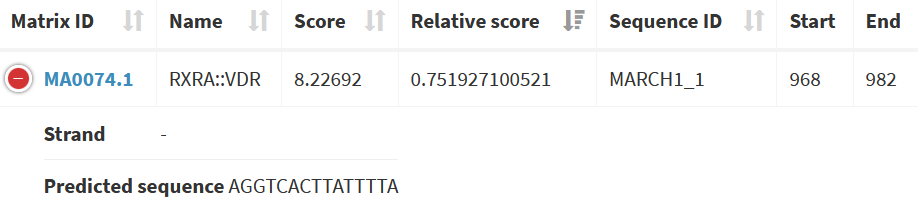

## HLA-DMB

#### VDRE

In [5]:
HLADMB <- "3109"   #entrez geneID
HLADMB_seq <- transcriptsBy(TxDb.Hsapiens.UCSC.hg38.knownGene, by="gene")[HLADMB] #transcripts by gene
HLADMB_seq

GRangesList object of length 1:
$`3109`
GRanges object with 63 ranges and 2 metadata columns:
                  seqnames            ranges strand |     tx_id
                     <Rle>         <IRanges>  <Rle> | <integer>
   [1]                chr6 32934629-32936886      - |     77581
   [2]                chr6 32934629-32936901      - |     77582
   [3]                chr6 32934629-32937439      - |     77583
   [4]                chr6 32934629-32938688      - |     77584
   [5]                chr6 32934629-32940984      - |     77585
   ...                 ...               ...    ... .       ...
  [59] chr6_GL000256v2_alt   4333862-4337921      - |    238182
  [60] chr6_GL000256v2_alt   4333862-4340217      - |    238183
  [61] chr6_GL000256v2_alt   4333862-4340254      - |    238184
  [62] chr6_GL000256v2_alt   4333862-4340303      - |    238185
  [63] chr6_GL000256v2_alt   4336597-4352360      - |    238186
                 tx_name
             <character>
   [1] ENST00000487996.5

In [6]:
promoter_HLADMB <- getPromoterSeq(HLADMB_seq, Hsapiens, upstream=1000, downstream=100)
promoter_HLADMB

DNAStringSetList of length 1
[["3109"]] 3109=TTTAACTAGCAAAAGAACGTATTAAACAAGATTTGGAGAAAAATTCCTTTTCCACCTTAAA...

In [7]:
as.character(promoter_HLADMB[["3109"]])[1]

3109 
"TTTAACTAGCAAAAGAACGTATTAAACAAGATTTGGAGAAAAATTCCTTTTCCACCTTAAAAAAACCCAATGTACAACTCTGGATTACTCTTAGCTTCCTTATTTCAAATACTTTCCAGTTTATGTACTTGAAATAAATACAACAACTTCTAGAACAGCTTGCAGTTCAGATCTGGCTTTTACTAATTGTAATCAAACATAATTCTGGAGGAGGAAAGAAAGAAAGGGGCAATGAAGGAATGGGAGAGAAGAAAGAGTAATGCAGGAATACATTCTAACGGTTCCCCTTCAAGGGGCAGCATGGCAGAGGGGGCTGGGGTGGAAAGTGGGTTGCAAAATCTACGAAGAGTTGCGATAGGGAAGAAACCAGGTTGAGGAAGCAGCCAGAATGTCACCCTCCTTCCTAAACATGTTTTTTTCTCCTATGCAGGGCCACCATCTGTGCAAGTAGCCAAAACCACTCCTTTTAACACGAGGGAGCCTGTGATGCTGGCCTGCTATGTGTGGGGCTTCTATCCAGCAGAAGTGACTATCACGTGGAGGAAGAACGGGAAGCTTGTCATGCCTCACAGCAGTGCGCACAAGACTGCCCAGCCCAATGGAGACTGGACATACCAGACCCTCTCCCATTTAGCCTTAACCCCCTCTTACGGGGACACTTACACCTGTGTGGTAGAGCACACTGGGGCTCCTGAGCCCATCCTTCGGGACTGGAGTAAGTGTATGGCAGATGGATGGAATTAGGGTCAAAGCAGAGAAAATGAGATGTGGATCGATACATGGTACATGGTAGACAGCGAAGTGCTGAAAATGGGGACTGAGTCTGGAGGAACTTACGGGGGGCTTAGGACCAGAATGGGGAAATGGGATAAAGAAATGGAAATATTTAGGTTGGTGCAAAAGTAATTGCAGTTTTTGCCATTACTTTCAGTGGCAAAAACCGCAATTACTTTTGCACCAGTTTAATATTTAGTCTGTGCTATTGCTGCTCTGGTGGTGTGGCTGATGTTGCTGCGTCTATGTTTGAGGGTGAGAGGGGAGCGTGCTTGCTTTGAAATGAGGCTGTAAATTTGGCAATCATATTTTCAGAACCCCAAATT"

In [17]:
scan_sequences(VDRE_PCM, unlist(promoter_HLADMB)[[3]], threshold = 0.001, threshold.type = 'pvalue', RC = TRUE)

DataFrame with 1 row and 12 columns
        motif   motif.i    sequence     start      stop     score
  <character> <integer> <character> <integer> <integer> <numeric>
1       motif         2           1       197       183     0.768
            match thresh.score min.score max.score        score.pct      strand
      <character>    <numeric> <numeric> <numeric>        <numeric> <character>
1 AGATCTTCAAGTTTA      -3.3281    -93.53    24.097 3.18711872847242           -